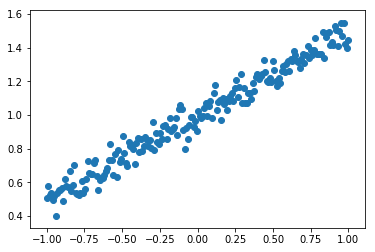

/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, input_dim=1)`


Training:
(0, ': ', 1.1679472)
(50, ': ', 0.25503558)
(100, ': ', 0.086002916)
(150, ': ', 0.03908404)
(200, ': ', 0.020408351)
(250, ': ', 0.011610357)
(300, ': ', 0.0072360351)

Testing
40/40 [==============================] - 0s 331us/step
('test cost', 0.0079367635771632195)
('Weight=', array([[ 0.61161053]], dtype=float32), '\tbiases', array([ 0.98880392], dtype=float32))


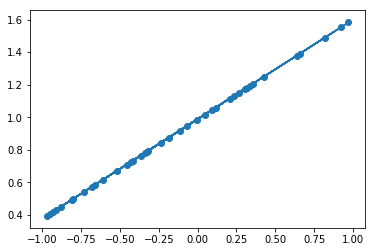

In [9]:
import numpy as np
from keras.models import Sequential  #按顺序建立的模型，一层一层的建立
from keras.layers import Dense  #全连接层
import matplotlib.pyplot as plt

X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y=0.5*X + 2+np.random.normal(-1,0.05,(200,))

plt.scatter(X,Y)
plt.show()

X_train = X[0:160]
Y_train = Y[0:160]
X_test = X[160:]
Y_test = Y[160:]

#建立神经网络
model = Sequential()
model.add(Dense(output_dim=1,input_dim=1))#输入输出都是1行1列
#可以添加更多层

#编译模型        mean squar        随机梯度下降
model.compile(loss='mse',optimizer="sgd")

#训练模型
print("Training:")
for step in range(301):
    cost = model.train_on_batch(X_train,Y_train)
    if step%50 == 0:
        print(step,": ",cost)
        
#测试
print("\nTesting")
cost = model.evaluate(X_test,Y_test,batch_size=40)
print("test cost",cost)
W,b = model.layers[0].get_weights() #获取第一层网络的参数
print("Weight=",W,"\tbiases",b)

#plotting th prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_pred)
plt.plot(X_test,Y_pred)
plt.show()

In [16]:
#手写数字识别
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation  #Activation是激励函数的包
from keras.optimizers import RMSprop 

#下载到列~/.keras/datasets中
#X train （60000 ，28x28）test (10000,28X28)
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

#print(Y_test[0:10])

X_train = X_train.reshape(X_train.shape[0],-1)/255
X_test = X_test.reshape(X_test.shape[0],-1)/255
Y_train = np_utils.to_categorical(Y_train,num_classes=10)
Y_test = np_utils.to_categorical(Y_test,num_classes=10)

#print(Y_test[0:10])

#build neural net
model = Sequential()
model.add(Dense(512,input_dim=784))   #输入是784 输出是32维
model.add(Activation('tanh'))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dense(10)) #输入是上一层传下来的所以不用定义了
# model.add(Dense(10,input_dim=784))
model.add(Activation("softmax"))

#定义优化器
rmsprop = RMSprop(lr=0.01, rho=0.9, epsilon=1e-8, decay=0.0)

#编译model
model.compile(optimizer=rmsprop,  #可以用默认优化器optimizer='rmsprop'
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#训练
print("Training......")
model.fit(X_train,Y_train,epochs=100,batch_size=64)
#测试
print("testing......")
loss,accuracy = model.evaluate(X_test,Y_test)
print("loss = ",loss)
print("accuracy = ",accuracy)

Training......
Epoch 1/100
60000/60000 [==============================] - 6s 97us/step - loss: 1.8233 - acc: 0.3607
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 1.7457 - acc: 0.3859
Epoch 3/100
60000/60000 [==============================] - 5s 87us/step - loss: 1.7336 - acc: 0.3904
Epoch 4/100
60000/60000 [==============================] - 5s 87us/step - loss: 1.7246 - acc: 0.3944
Epoch 5/100
60000/60000 [==============================] - 5s 88us/step - loss: 1.7216 - acc: 0.3973
Epoch 6/100
60000/60000 [==============================] - 5s 89us/step - loss: 1.7151 - acc: 0.3987
Epoch 7/100
60000/60000 [==============================] - 5s 89us/step - loss: 1.7080 - acc: 0.4023
Epoch 8/100
60000/60000 [==============================] - 5s 89us/step - loss: 1.7042 - acc: 0.4018
Epoch 9/100
60000/60000 [==============================] - 5s 89us/step - loss: 1.7013 - acc: 0.4022
Epoch 10/100
60000/60000 [==============================] - 5s 90us/step - l

In [1]:
#CNN
import numpy as py
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D,Flatten
from keras.optimizers import Adam

(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)
Y_test = np_utils.to_categorical(Y_test,num_classes=10)
Y_train = np_utils.to_categorical(Y_train,num_classes=10)

model = Sequential()

#convolution  1
model.add(Convolution2D(
    filters=32,
    kernel_size=(5,5),
    border_mode='same',
    input_shape=(28,28,1),
    ))
model.add(Activation('relu'))

#pooling
model.add(MaxPooling2D(
    pool_size=(2, 2), strides=(2, 2), padding='valid',
))

#convolution 2 (64, 14, 14)
model.add(Convolution2D(
    filters=64,
    kernel_size=(5,5),
    border_mode='same'
        ))
model.add(Activation('relu'))

#pooling 2 (64, 7, 7)
model.add(MaxPooling2D(
    pool_size=(2, 2), strides=(2,2),
))

#Flatten 将三维数组转化为一维
model.add(Flatten())

#Dense是全联接层 输入维64*7*7 = 3136
model.add(Dense(1024)) #输出大小维1024
model.add(Activation('relu'))

#Dense 2
model.add(Dense(10))
model.add(Activation('softmax'))


adam = Adam(lr=1E-4)

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print("Training ====================")
model.fit(X_train,Y_train, nb_epoch, batch_size=32)

print('Testing =====================')
loss, accuracy = model.evaluate(X_test,Y_test)
print("loss = ", loss)
print("accuracy", accuracy)

/Users/s/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(padding="same", kernel_size=(5, 5), input_shape=(28, 28, 1..., filters=32)`
/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(padding="same", kernel_size=(5, 5), filters=64)`


Training ====================


NameError: name 'nb_epoch' is not defined

In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 128
nb_classes = 10
nb_epoch = 12

# 输入图像的维度，此处是mnist图像，因此是28*28
img_rows, img_cols = 28, 28
# 卷积层中使用的卷积核的个数
nb_filters = 32
# 池化层操作的范围
pool_size = (2,2)
# 卷积核的大小
kernel_size = (3,3)
# keras中的mnist数据集已经被划分成了60,000个训练集，10,000个测试集的形式，按以下格式调用即可
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 后端使用tensorflow时，即tf模式下，
# 会将100张RGB三通道的16*32彩色图表示为(100,16,32,3)，
# 第一个维度是样本维，表示样本的数目，
# 第二和第三个维度是高和宽，
# 最后一个维度是通道维，表示颜色通道数
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# 将X_train, X_test的数据格式转为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 归一化
X_train /= 255
X_test /= 255
# 打印出相关信息
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# 将类别向量(从0到nb_classes的整数向量)映射为二值类别矩阵，
# 相当于将向量用one-hot重新编码
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# 建立序贯模型
model = Sequential()

# 卷积层，对二维输入进行滑动窗卷积
# 当使用该层为第一层时，应提供input_shape参数，在tf模式中，通道维位于第三个位置
# border_mode：边界模式，为"valid","same"或"full"，即图像外的边缘点是补0
# 还是补成相同像素，或者是补1
model.add(Convolution2D(nb_filters, kernel_size[0] ,kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))

# 卷积层，激活函数是ReLu
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# 池化层，选用Maxpooling，给定pool_size，dropout比例为0.25
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# Flatten层，把多维输入进行一维化，常用在卷积层到全连接层的过渡
model.add(Flatten())

# 包含128个神经元的全连接层，激活函数为ReLu，dropout比例为0.5
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 包含10个神经元的输出层，激活函数为Softmax
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# 输出模型的参数信息
model.summary()
# 配置模型的学习过程
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

# 训练模型
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

# 按batch计算在某些输入数据上模型的误差
score = model.evaluate(X_test, Y_test, verbose=0)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________

/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:61: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:65: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`



Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (

/Users/s/anaconda2/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.3054 - acc: 0.9053 - val_loss: 0.0679 - val_acc: 0.9793
Epoch 2/12
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1041 - acc: 0.9688 - val_loss: 0.0454 - val_acc: 0.9847
Epoch 3/12
25216/60000 [===========>..................] - ETA: 49s - loss: 0.0801 - acc: 0.9772

In [2]:
# simple RNN
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam

TIME_STEPS = 28    #每次读取一行相当于28个时间点， 
INPUT_SIZE = 28    #same as th width of the image
BATCH_SIZE = 50    #每次训练50张图片
BATCH_INDEX = 0
OUTPUT_SIZE = 10
CELL_SIZE = 50    #RNN中放多少个hidden layer
LR = 0.001

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(-1,28,28)/255
X_test = X_test.reshape(-1,28,28)/255
Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test,num_classes=10)

model = Sequential()
#RNN cell
model.add(SimpleRNN(
          batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
          output_dim=CELL_SIZE,     #输出为50
         ))
#output layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation("softmax"))

#optimizer
adam = Adam(LR)
model.compile(optimizer=adam,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#training
for step in range(3001):
    #data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX:BATCH_SIZE+BATCH_INDEX, :, :]
    Y_batch = Y_train[BATCH_INDEX:BATCH_SIZE+BATCH_INDEX, :]
    cost = model.train_on_batch(X_batch, Y_batch)
    
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX
    
    if step % 500 == 0:
        cost, accuracy = model.evaluate(X_test, Y_test, batch_size= 50 ,verbose=False)
        print('test cost:', cost, 'test accuracy', accuracy)
    


/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(units=50, batch_input_shape=(50, 28, 2...)`


('test cost:', 2.3217386293411253, 'test accuracy', 0.09859999930486082)
('test cost:', 1.8908335554599762, 'test accuracy', 0.3216999989002943)
('test cost:', 1.8661453479528427, 'test accuracy', 0.34100000135600567)
('test cost:', 1.8399759697914124, 'test accuracy', 0.3392000006511807)
('test cost:', 1.8101575756072998, 'test accuracy', 0.3482999997586012)
('test cost:', 1.7833512204885482, 'test accuracy', 0.3696000000834465)
('test cost:', 1.7945068663358688, 'test accuracy', 0.359899999499321)


/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(stateful=True, return_sequences=True, units=20, batch_input_shape=(64, 20, 1...)`


Training.....


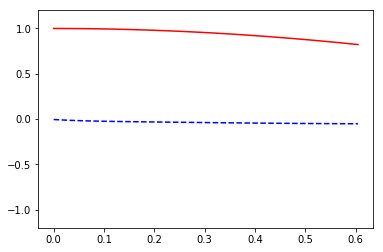

('train cost:', 0.5033713)


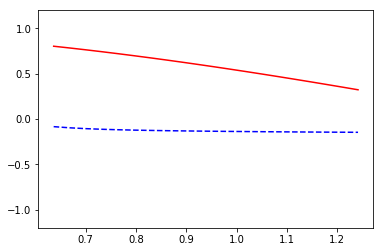

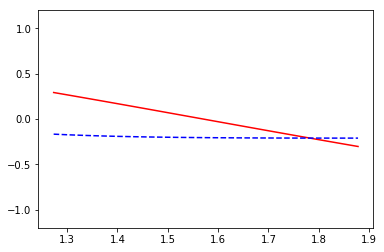

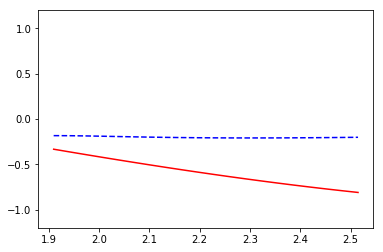

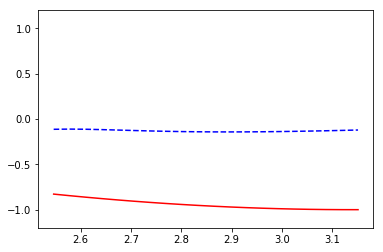

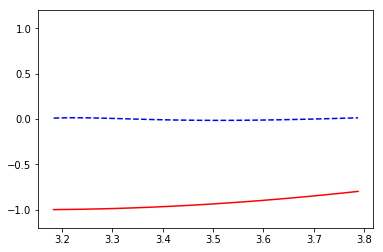

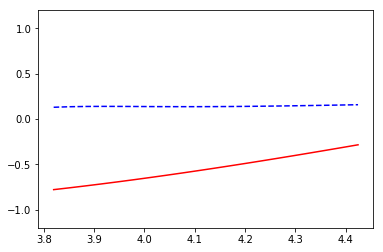

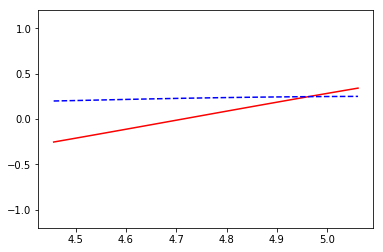

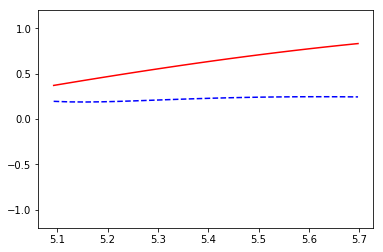

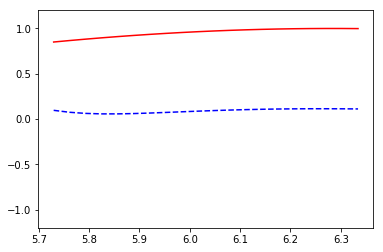

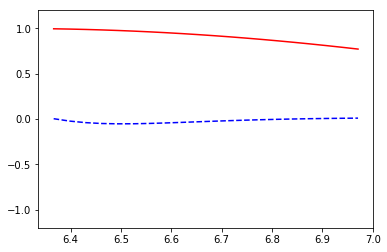

('train cost:', 0.41870284)


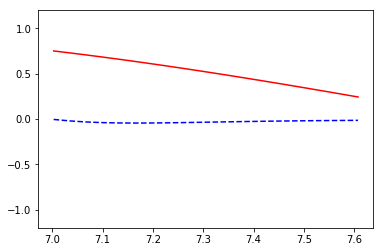

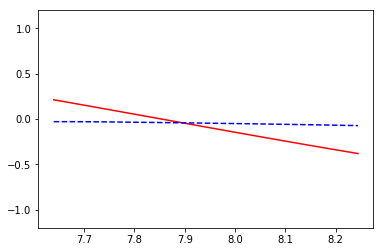

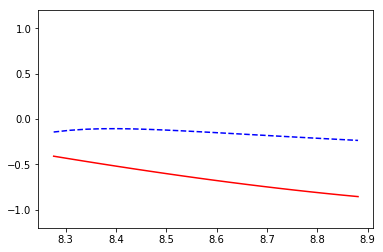

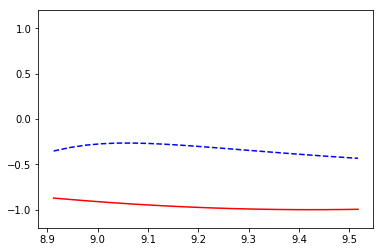

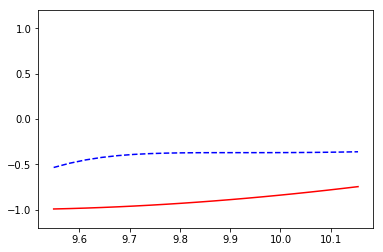

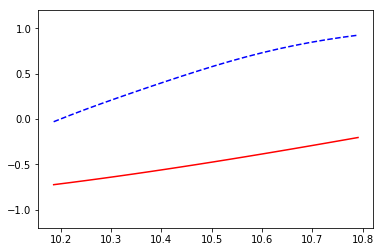

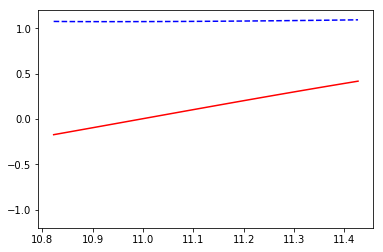

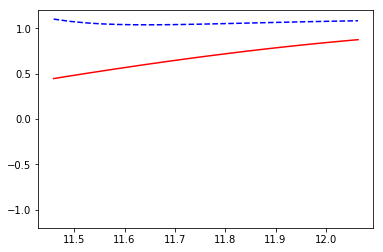

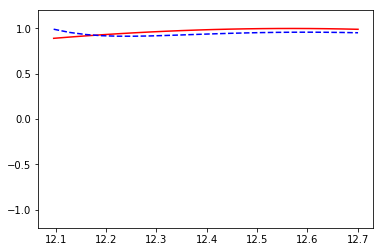

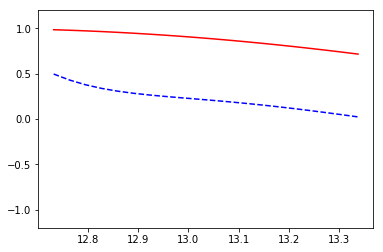

('train cost:', 0.27364117)


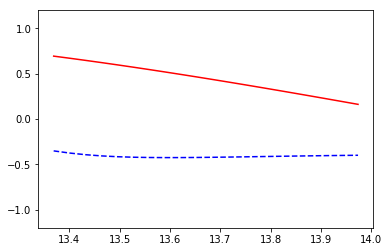

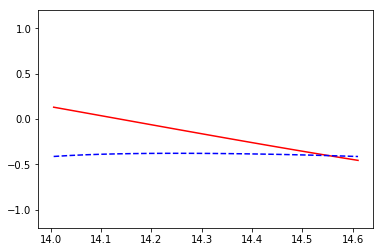

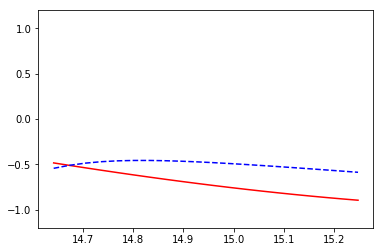

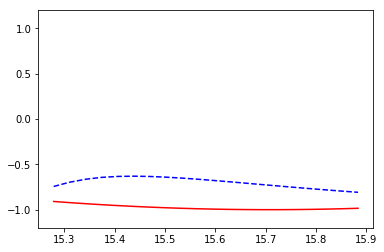

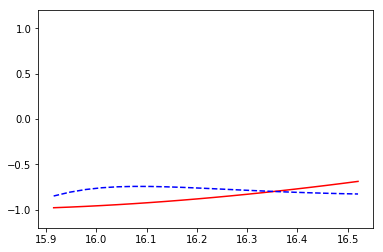

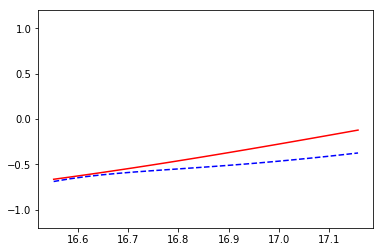

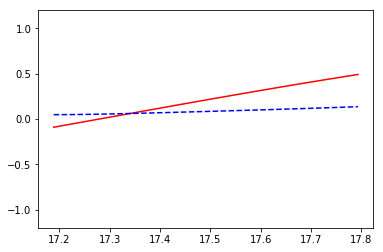

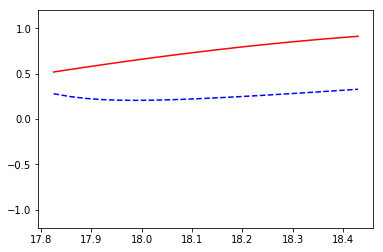

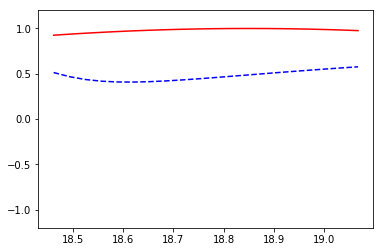

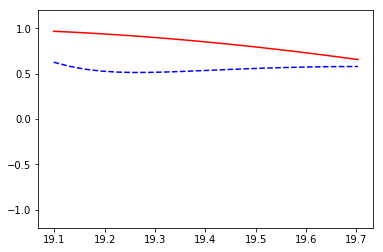

('train cost:', 0.10970773)


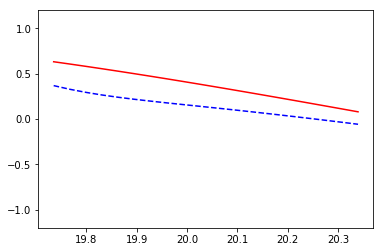

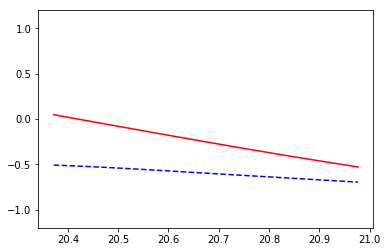

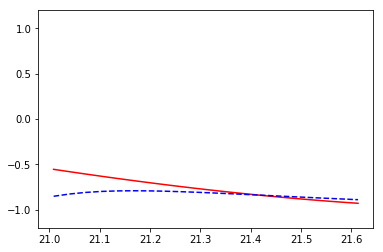

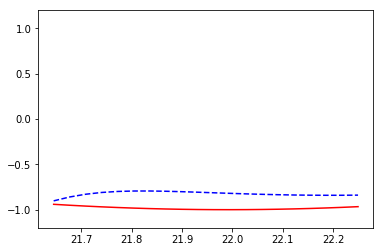

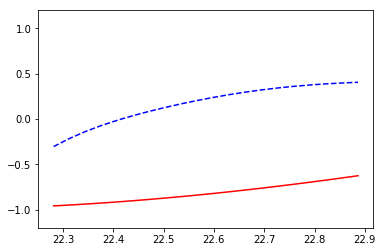

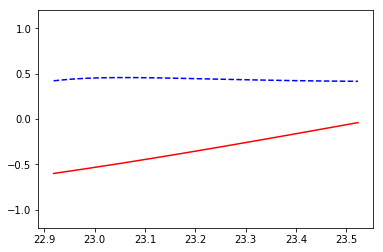

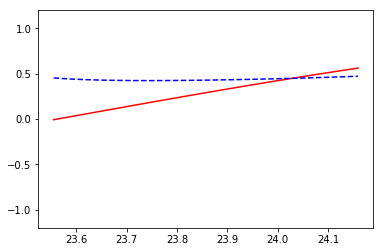

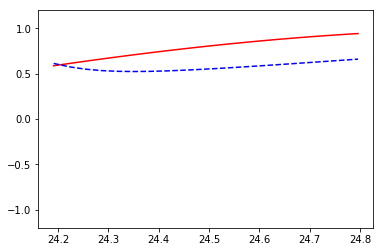

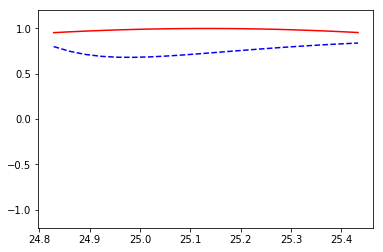

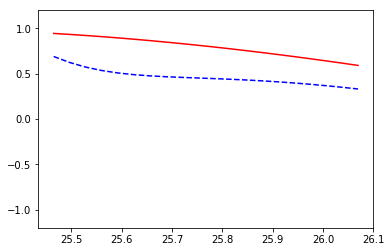

('train cost:', 0.1505366)


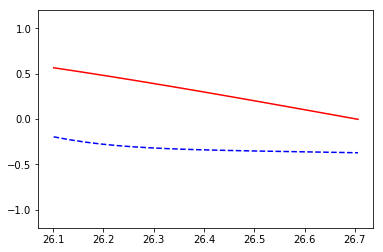

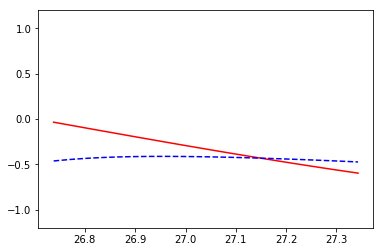

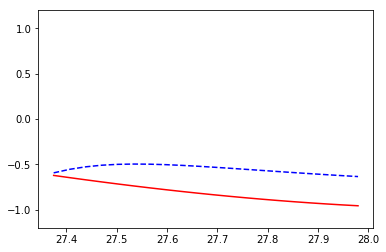

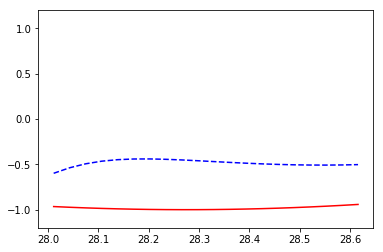

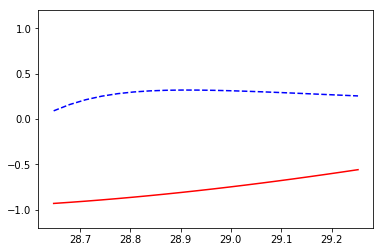

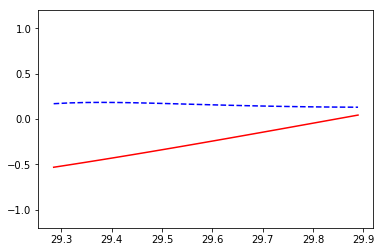

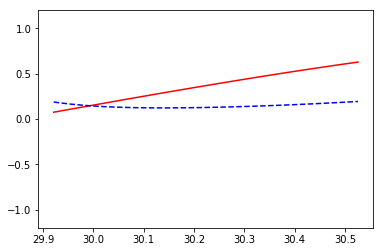

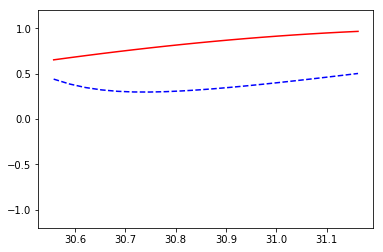

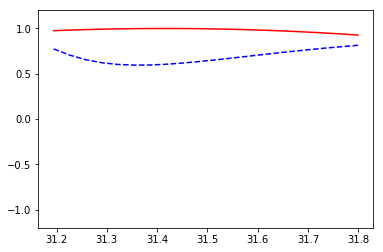

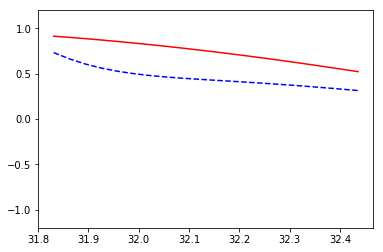

('train cost:', 0.054691378)


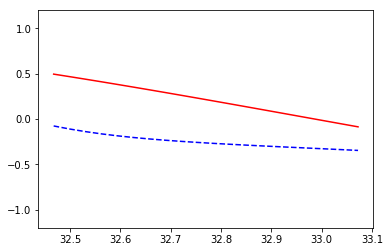

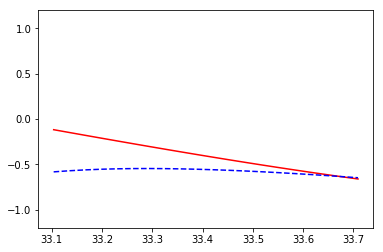

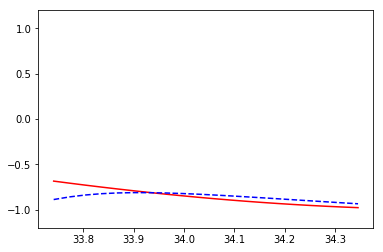

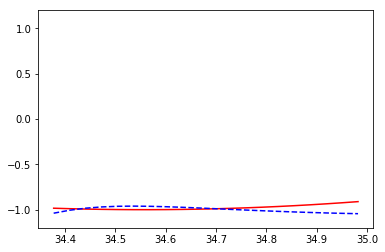

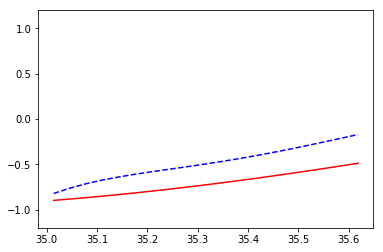

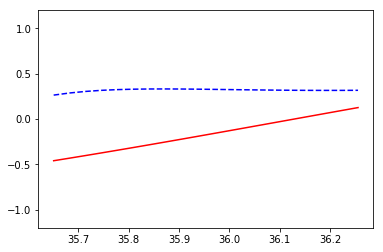

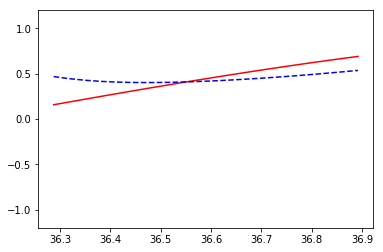

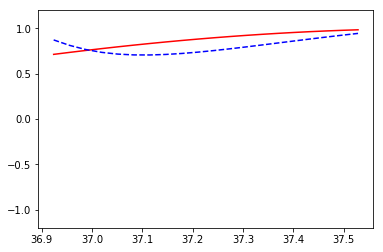

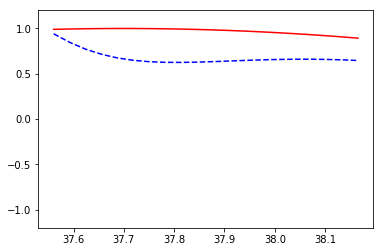

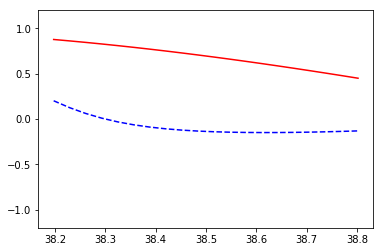

('train cost:', 0.08997481)


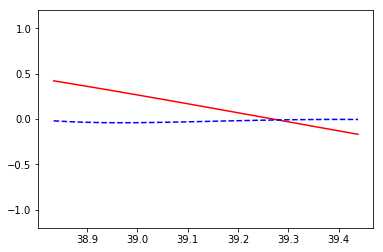

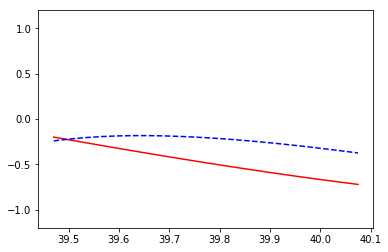

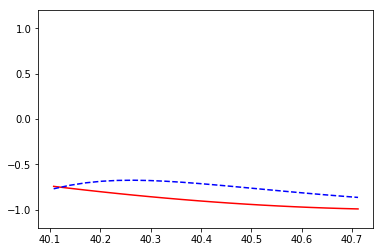

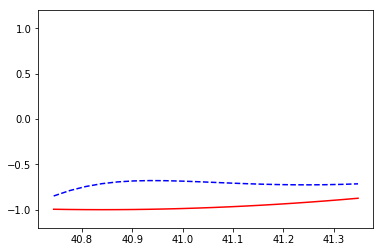

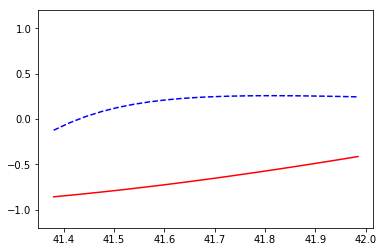

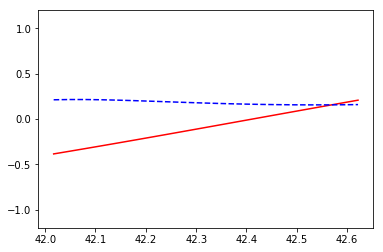

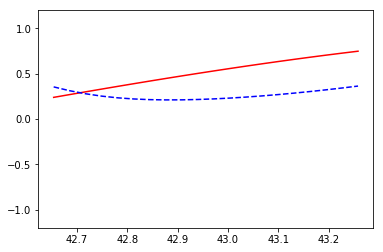

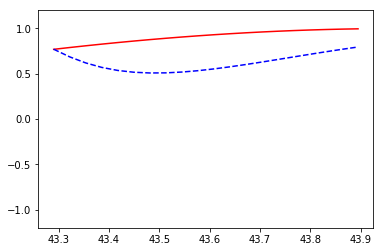

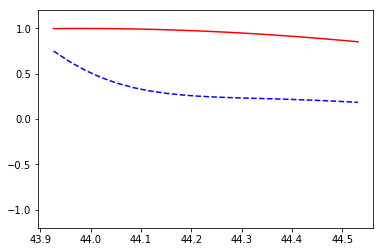

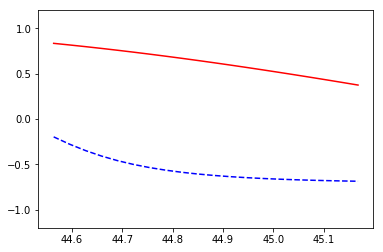

('train cost:', 0.09432302)


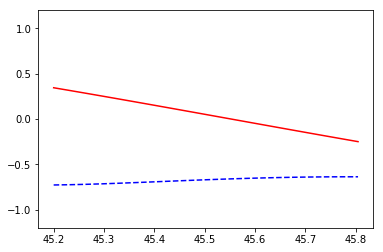

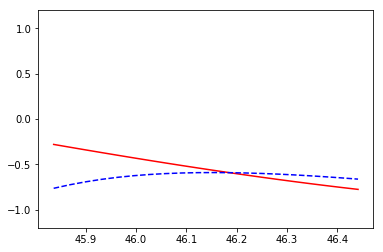

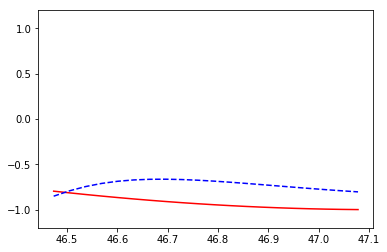

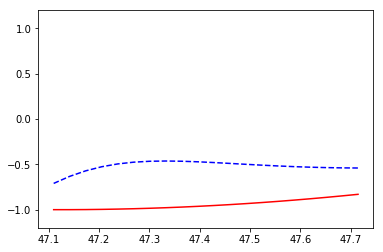

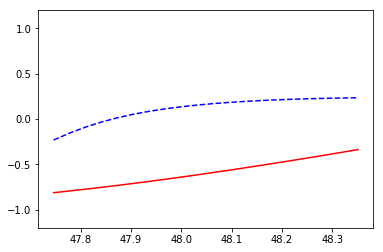

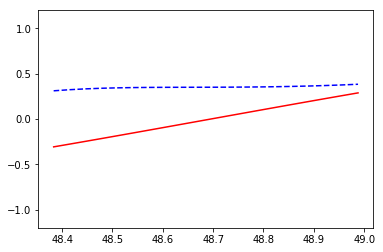

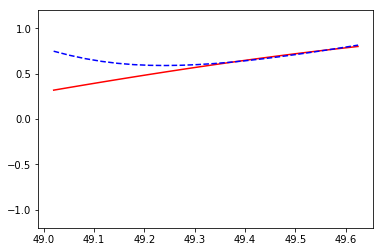

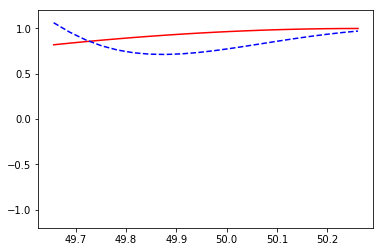

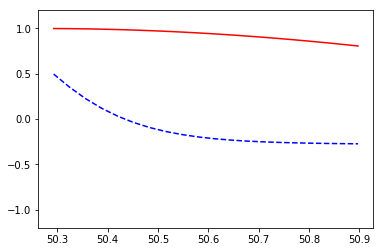

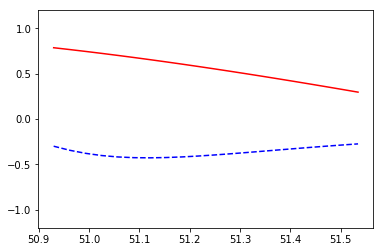

('train cost:', 0.11165558)


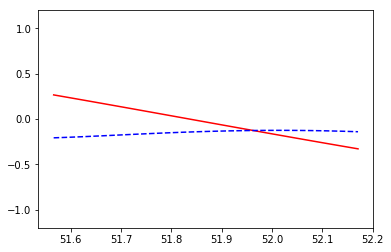

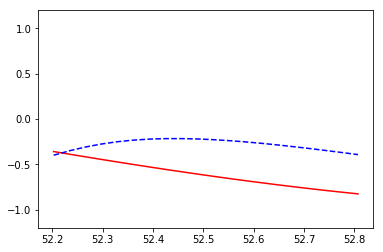

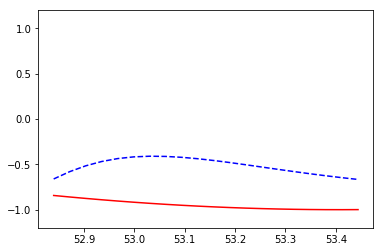

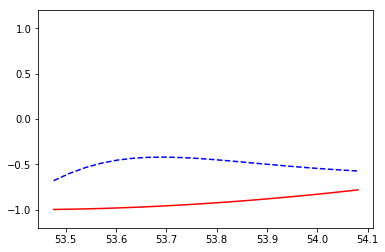

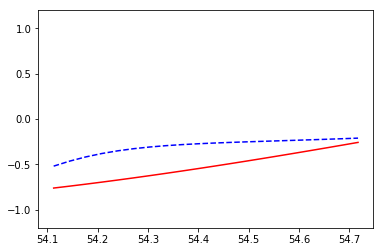

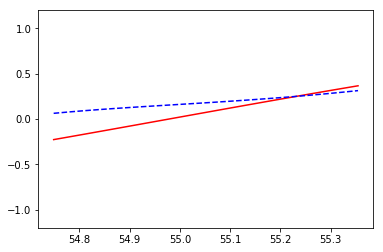

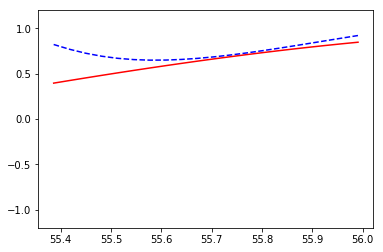

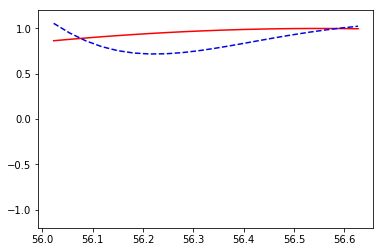

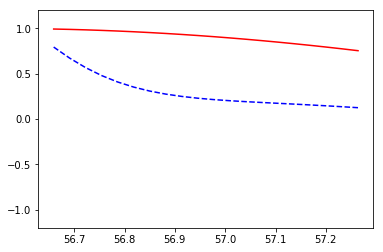

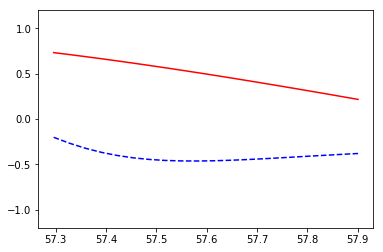

('train cost:', 0.055997055)


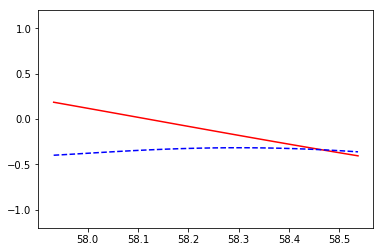

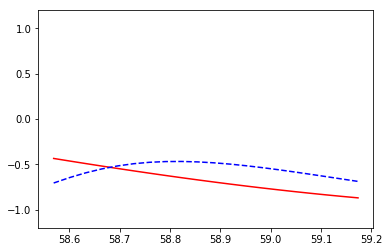

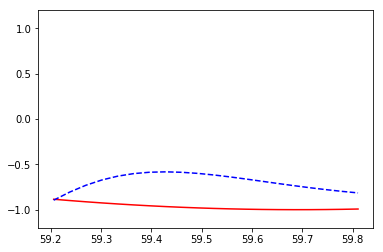

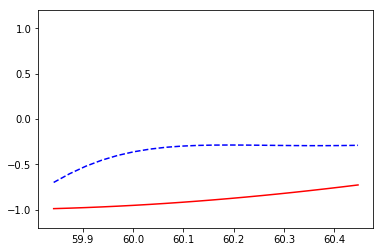

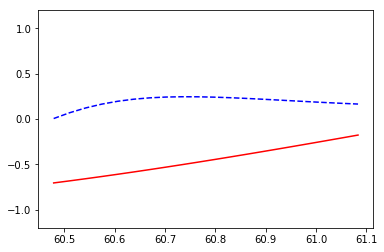

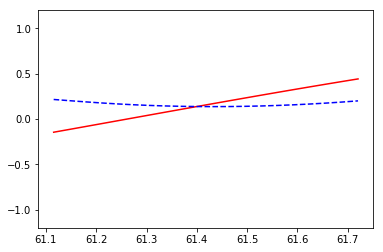

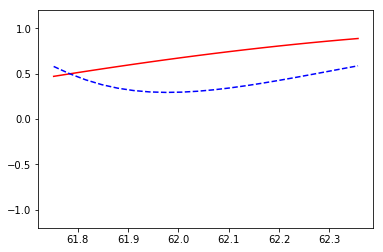

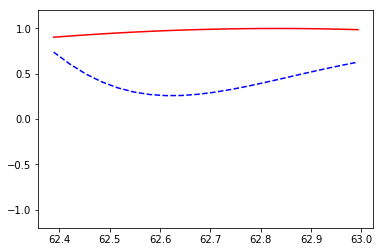

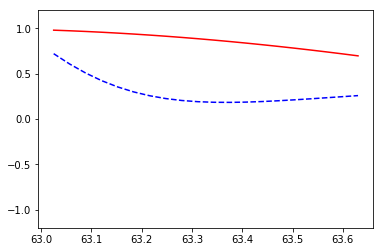

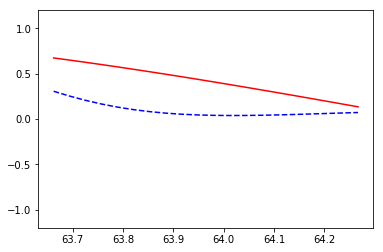

('train cost:', 0.032226816)


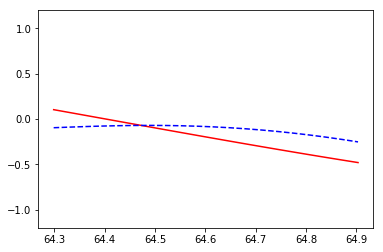

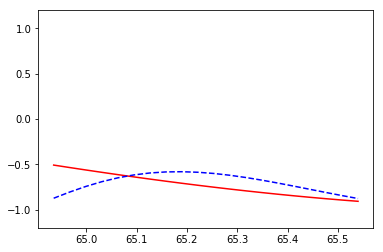

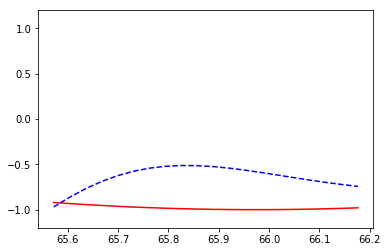

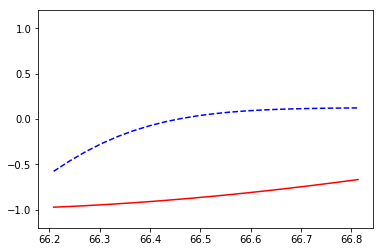

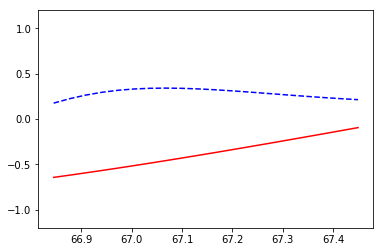

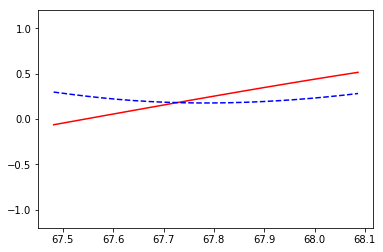

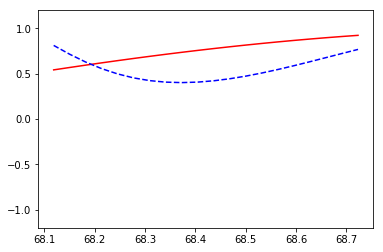

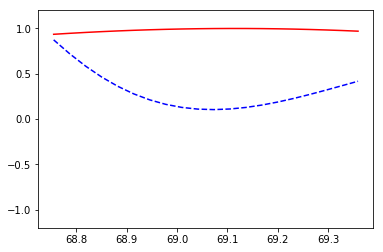

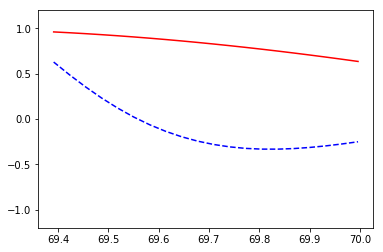

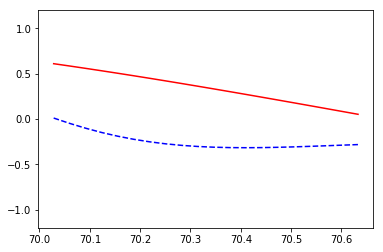

('train cost:', 0.052888792)


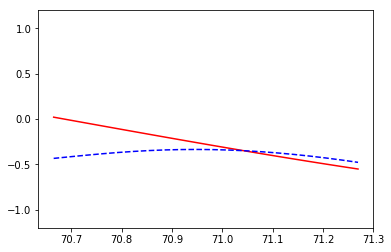

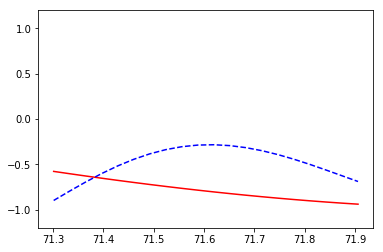

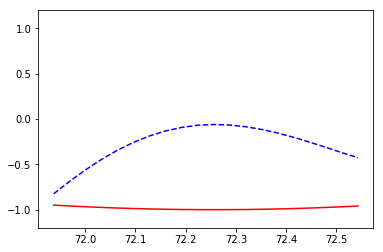

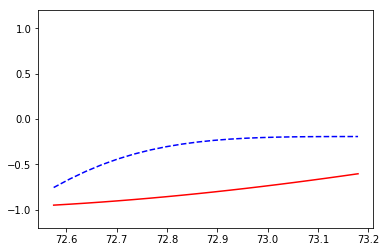

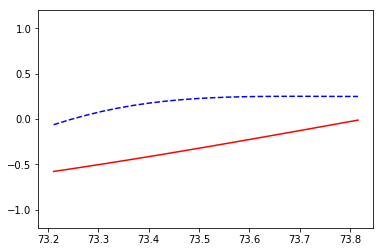

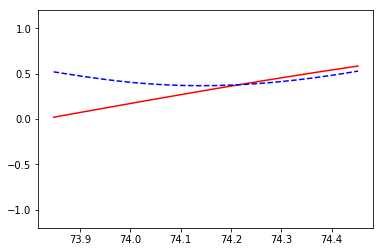

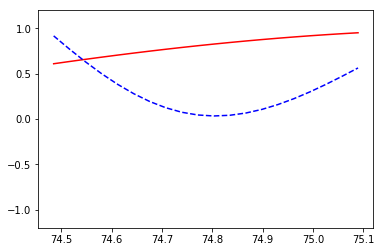

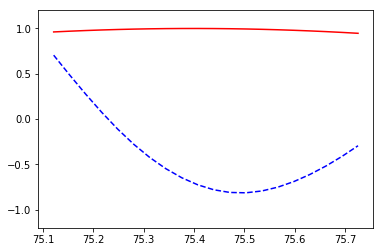

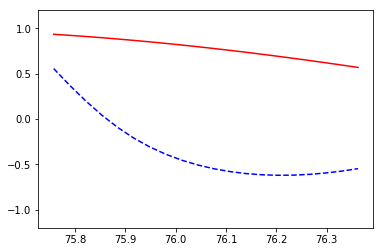

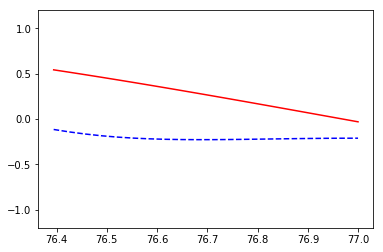

('train cost:', 0.08294152)


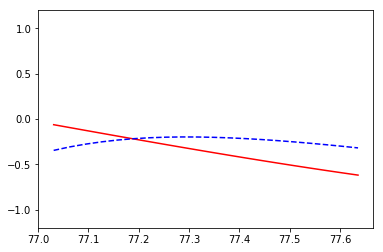

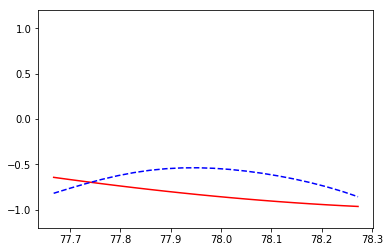

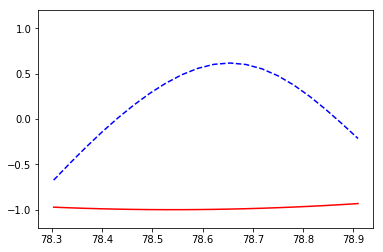

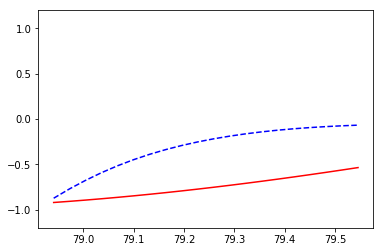

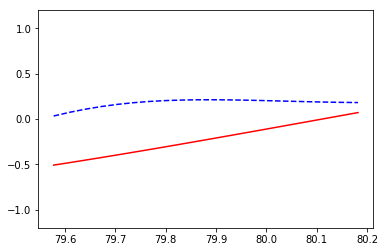

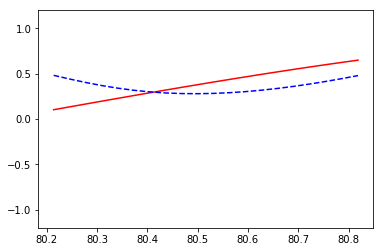

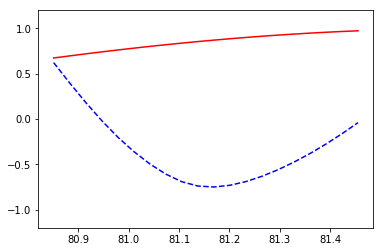

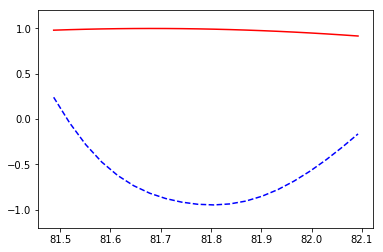

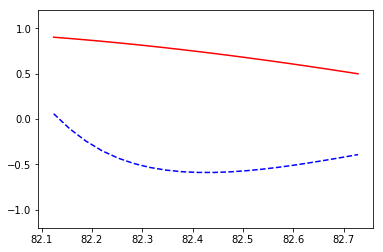

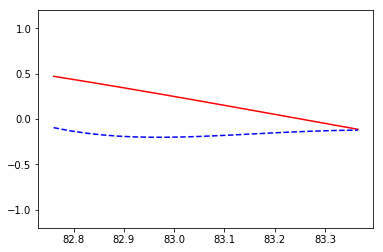

('train cost:', 0.07202731)


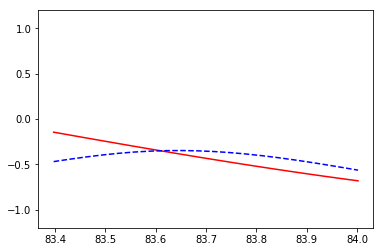

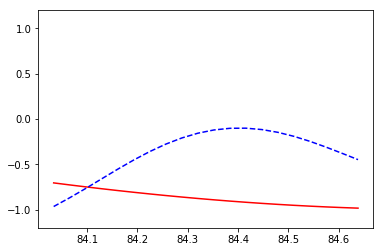

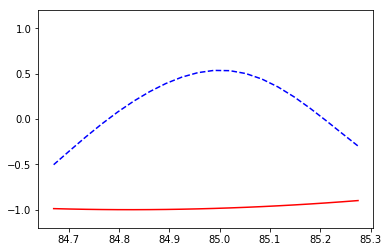

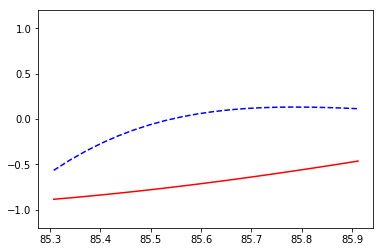

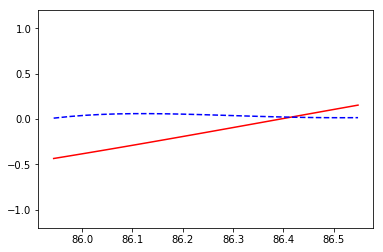

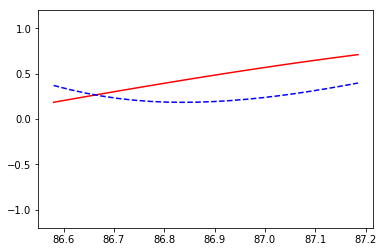

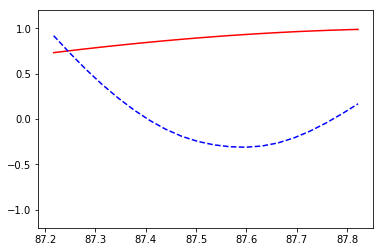

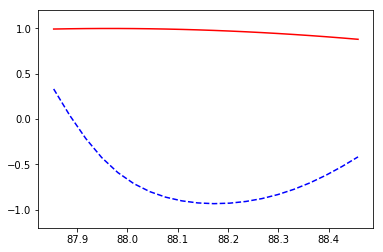

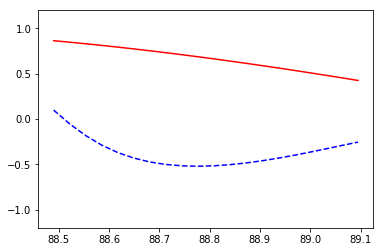

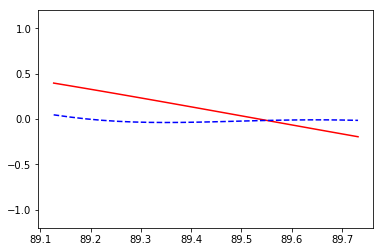

('train cost:', 0.085105464)


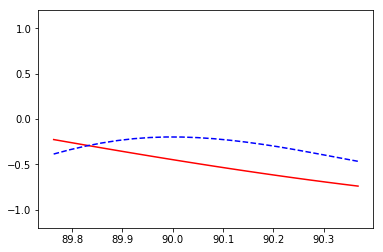

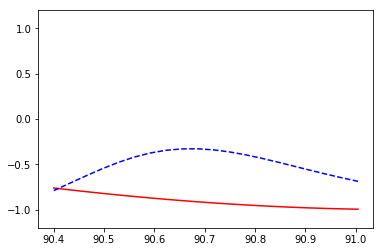

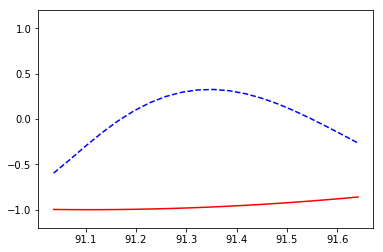

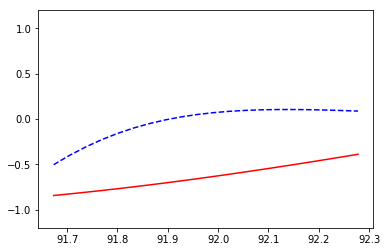

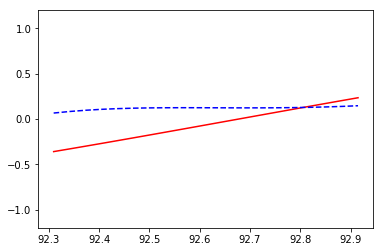

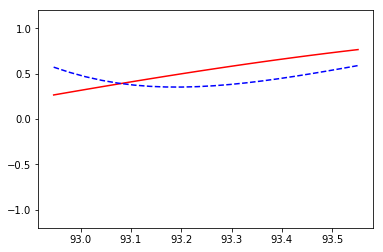

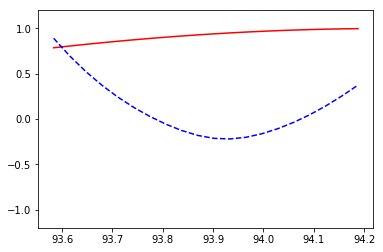

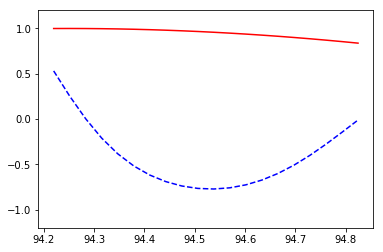

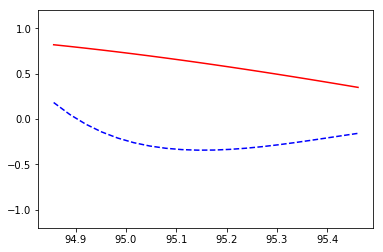

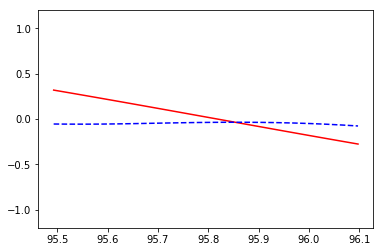

('train cost:', 0.04566258)


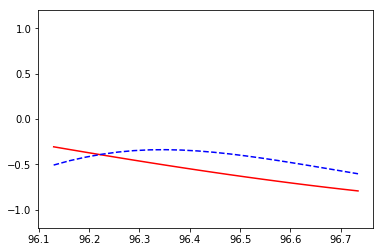

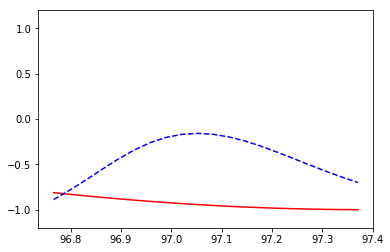

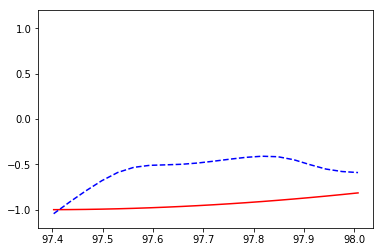

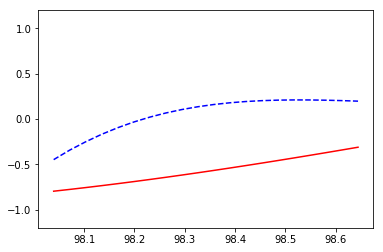

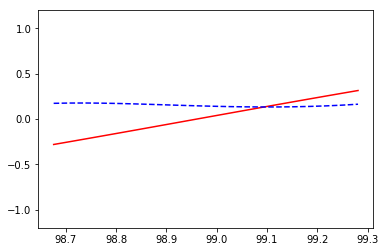

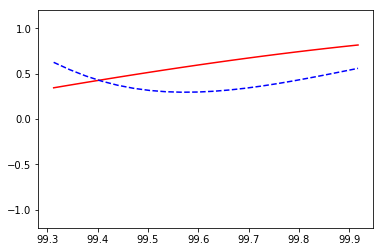

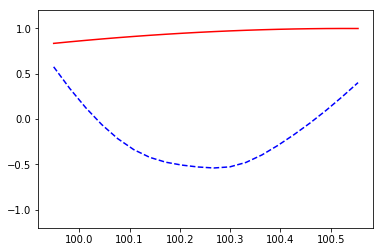

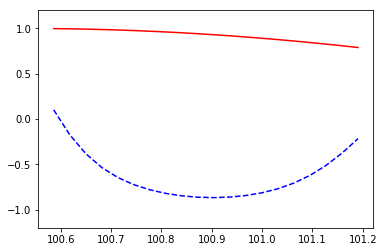

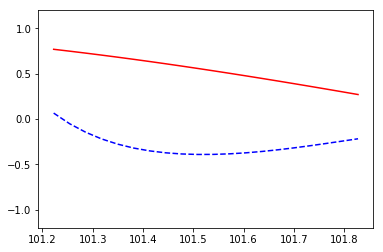

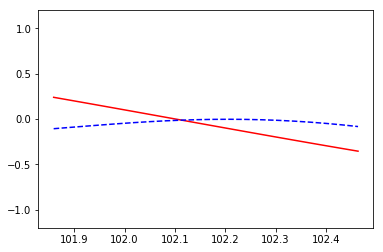

('train cost:', 0.057014562)


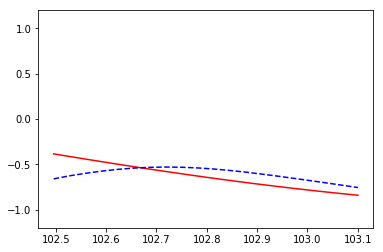

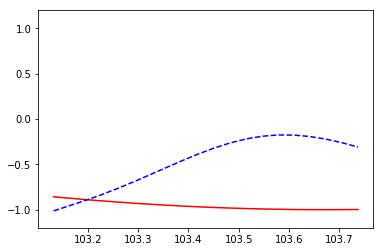

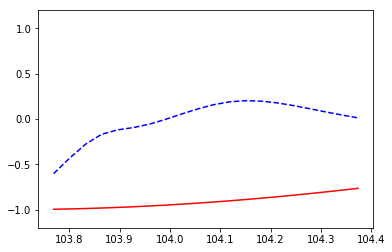

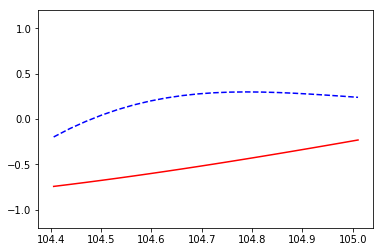

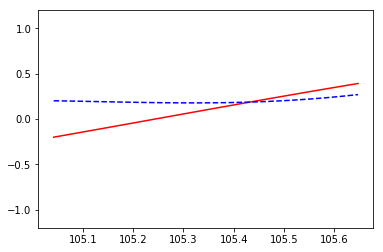

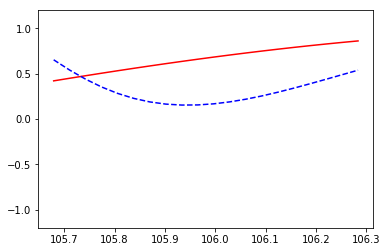

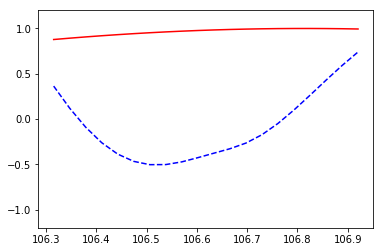

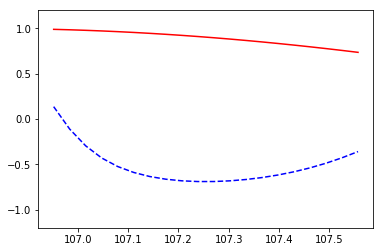

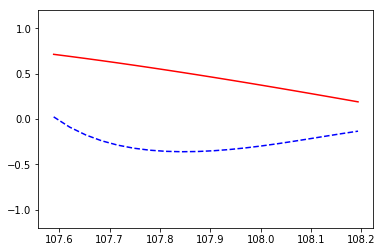

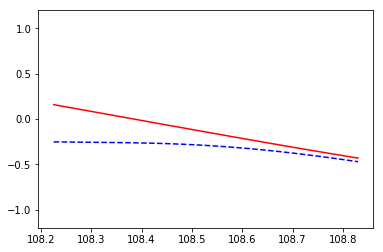

('train cost:', 0.046342127)


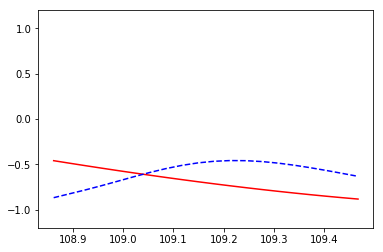

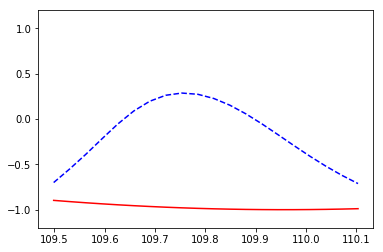

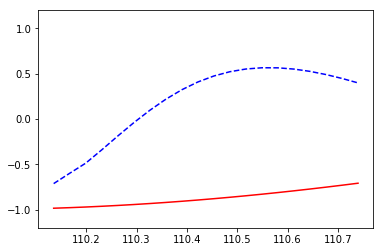

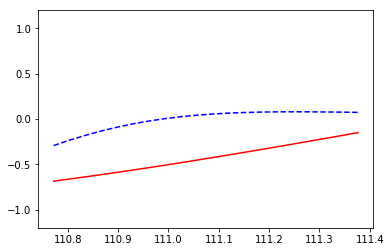

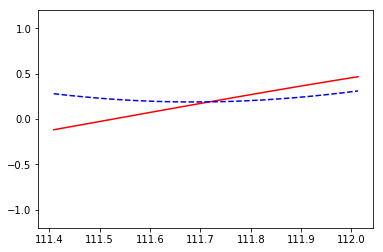

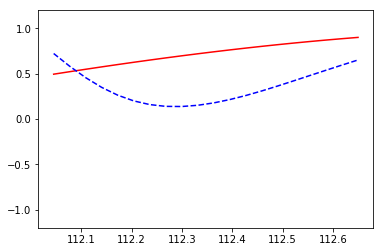

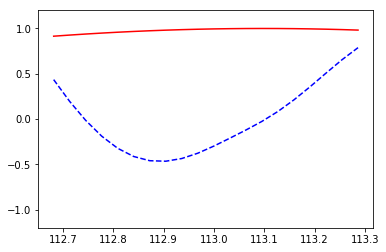

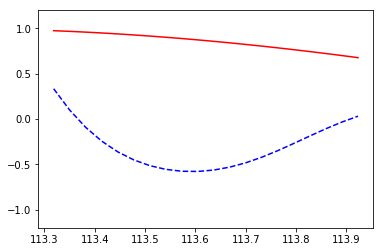

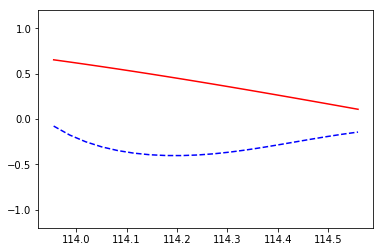

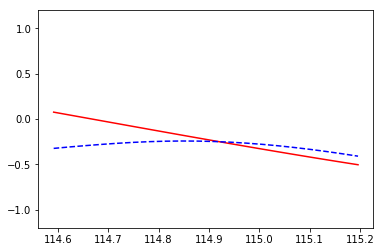

('train cost:', 0.04121834)


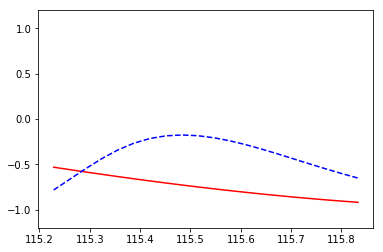

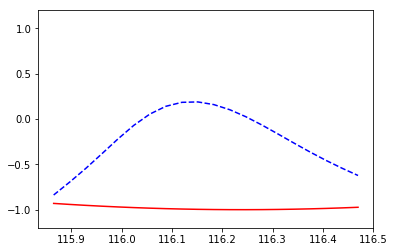

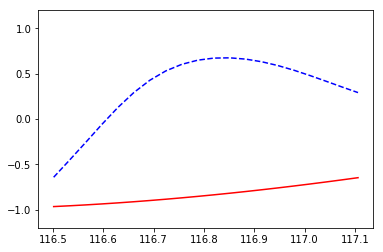

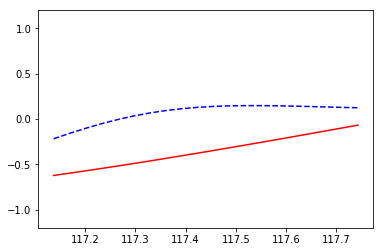

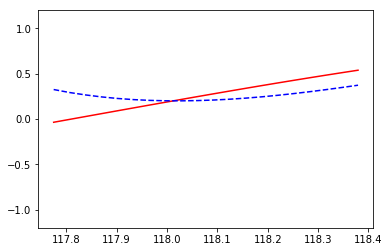

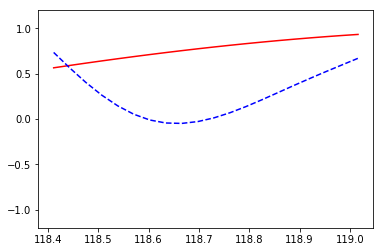

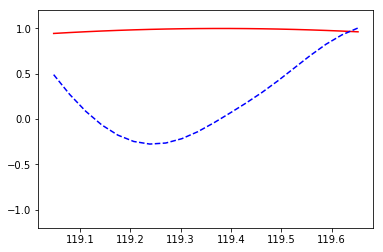

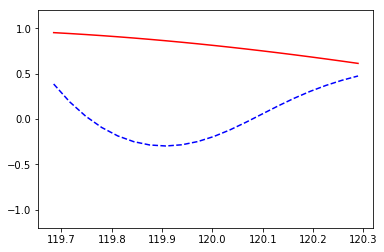

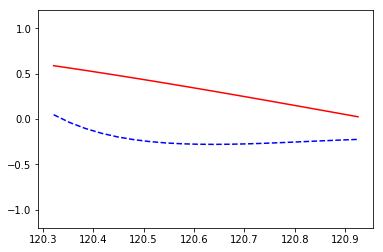

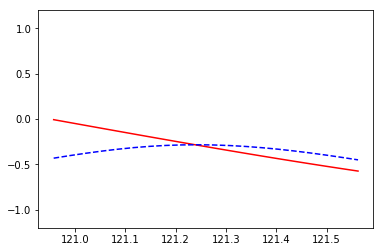

('train cost:', 0.04608047)


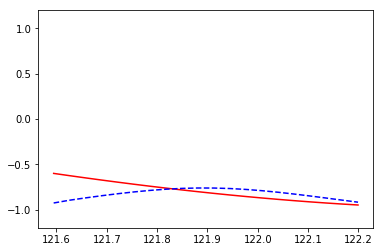

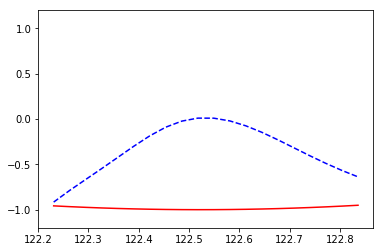

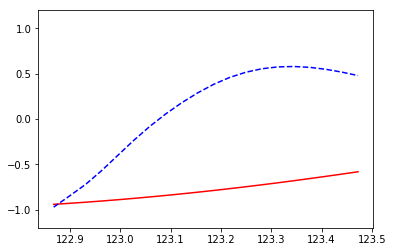

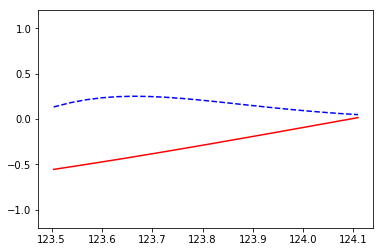

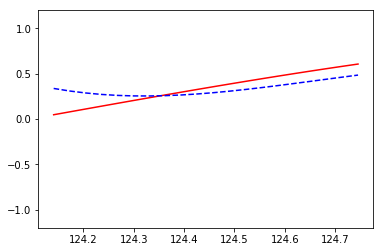

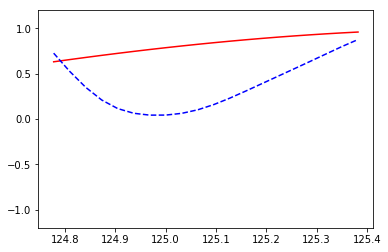

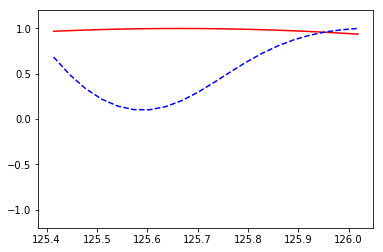

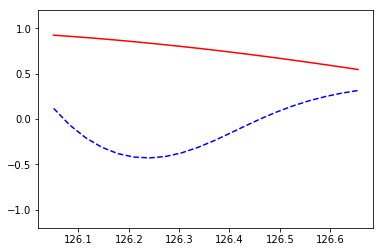

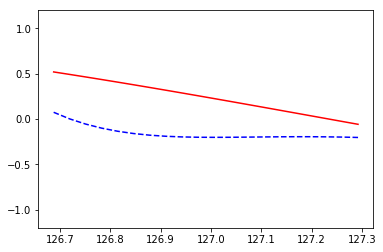

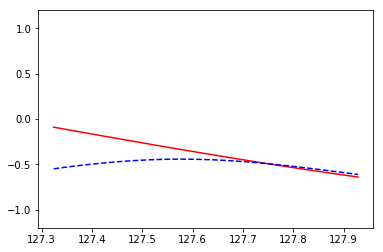

('train cost:', 0.038886674)


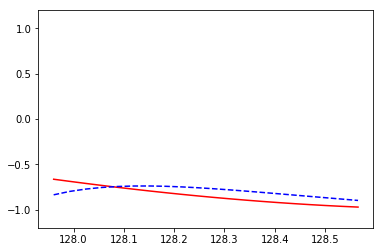

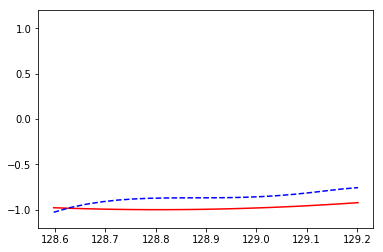

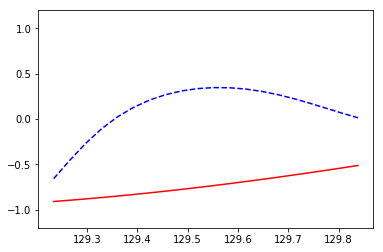

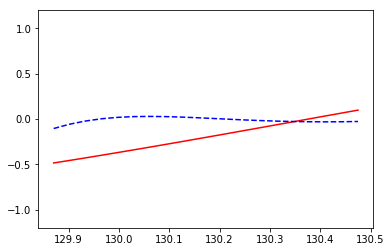

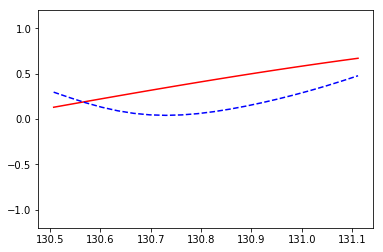

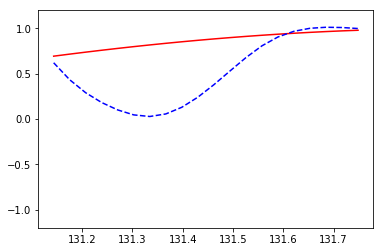

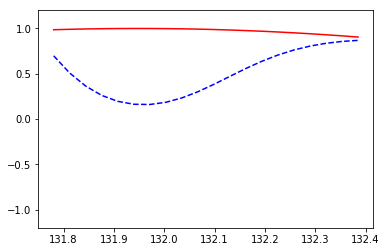

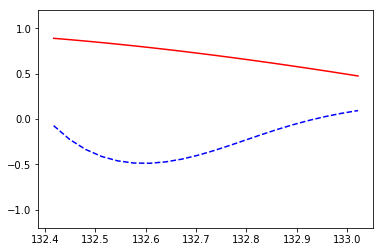

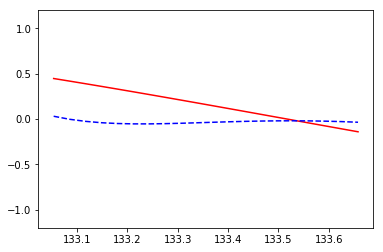

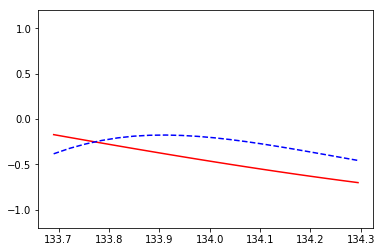

('train cost:', 0.053245947)


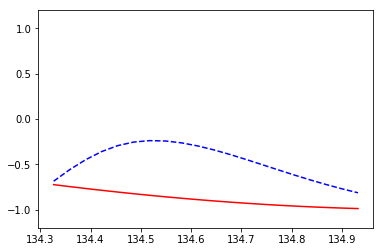

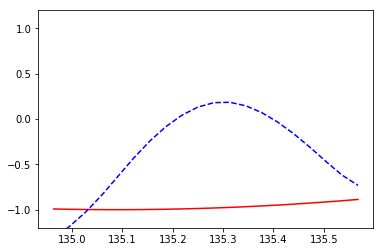

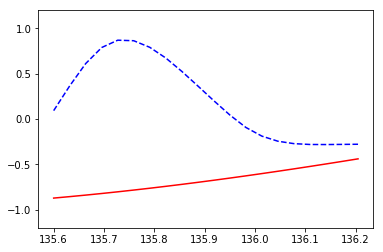

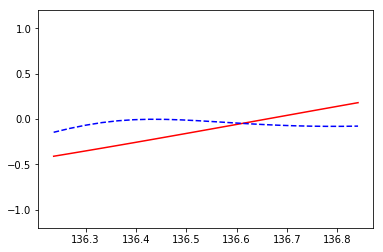

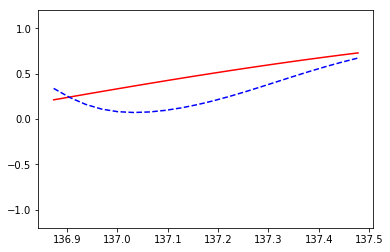

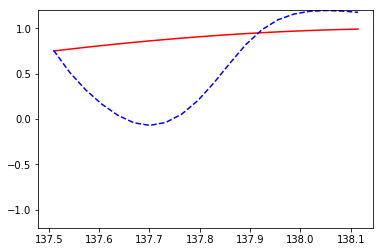

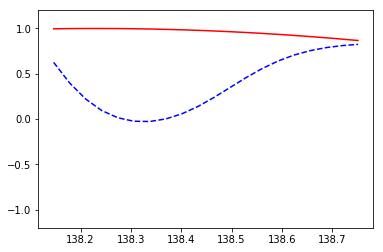

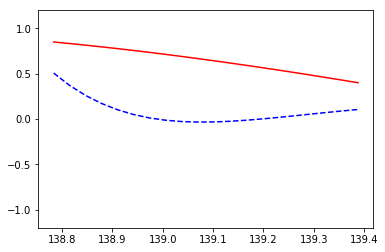

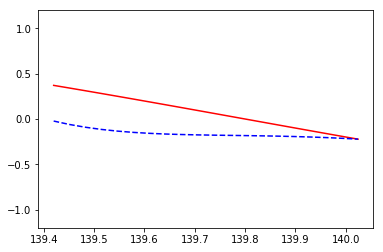

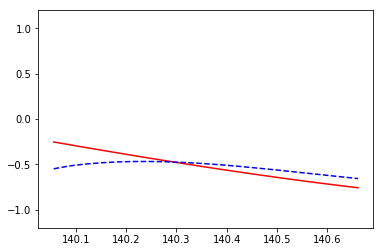

('train cost:', 0.05758546)


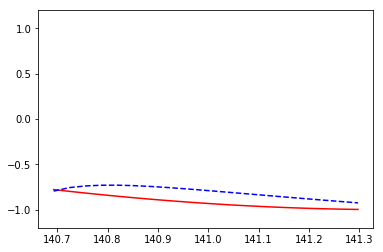

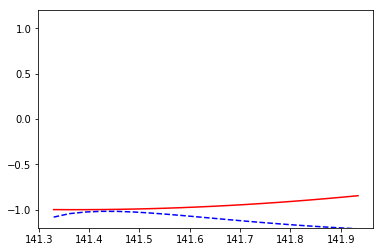

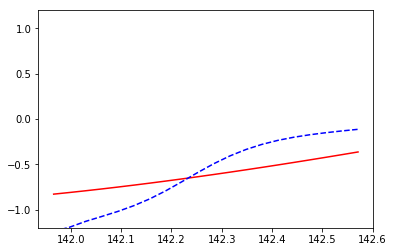

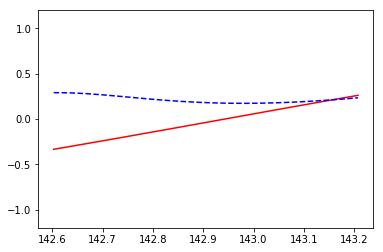

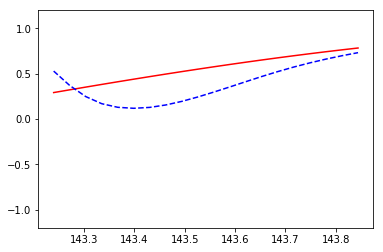

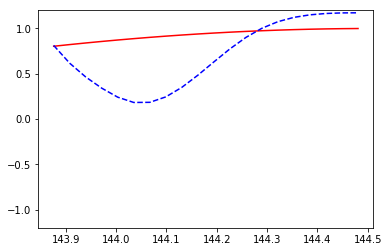

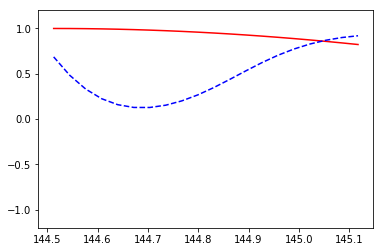

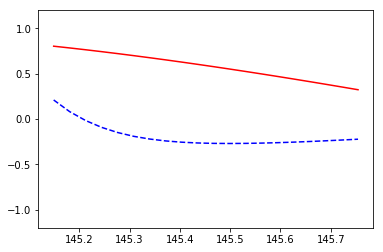

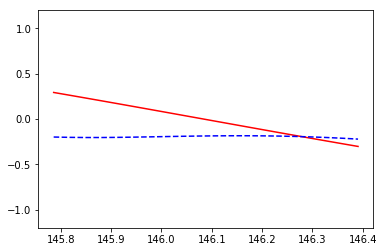

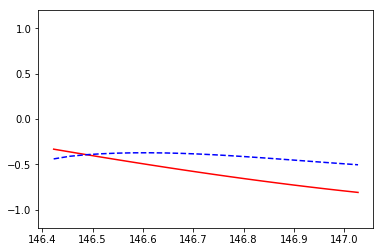

('train cost:', 0.14449318)


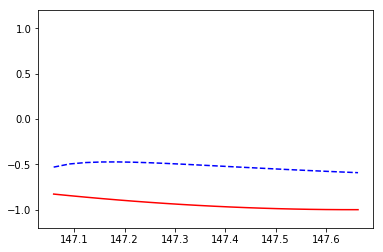

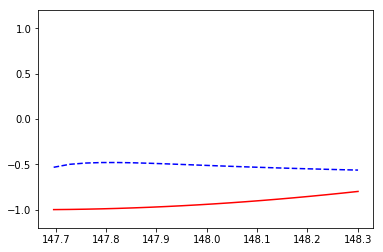

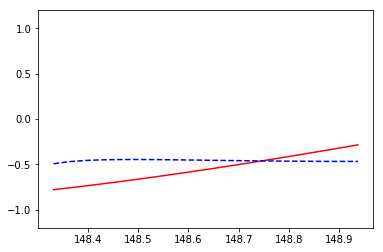

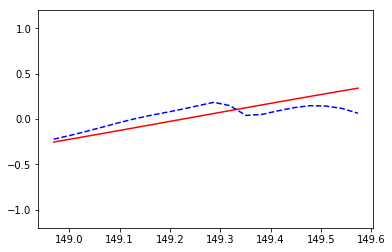

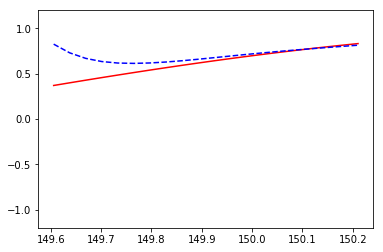

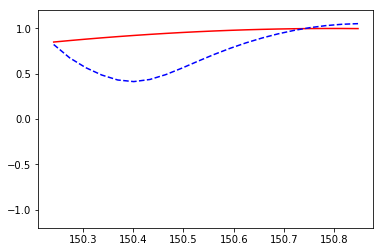

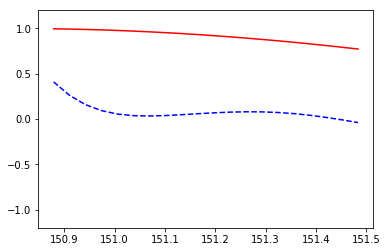

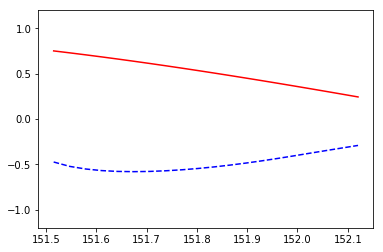

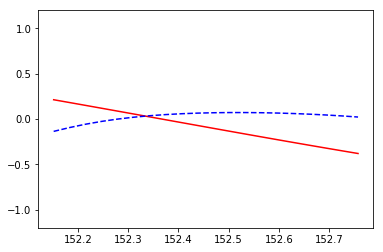

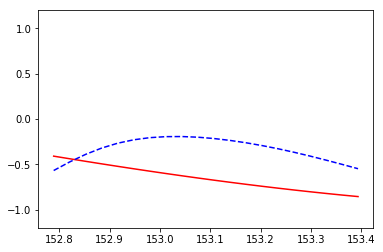

('train cost:', 0.05173301)


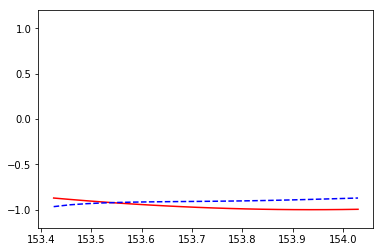

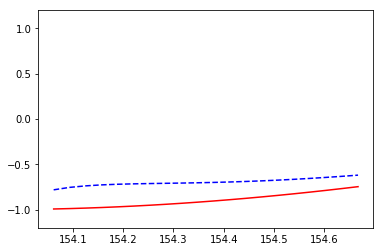

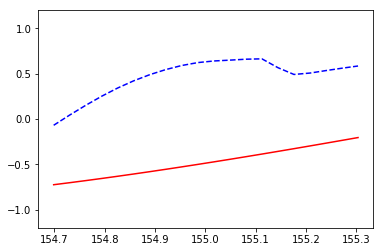

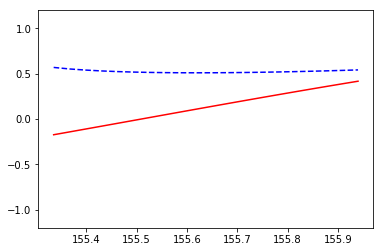

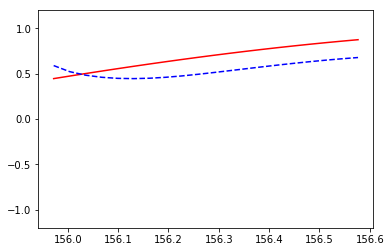

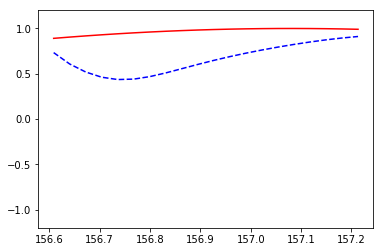

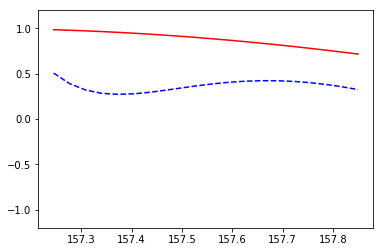

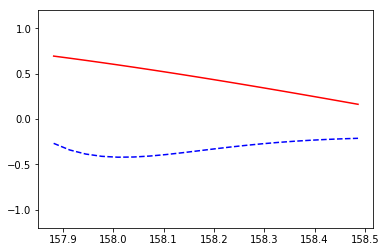

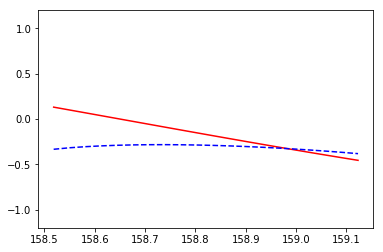

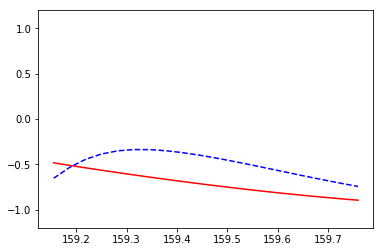

('train cost:', 0.05215863)


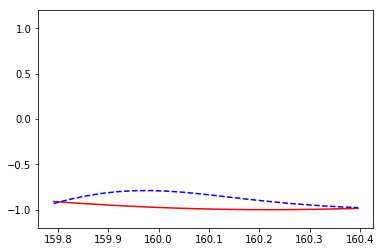

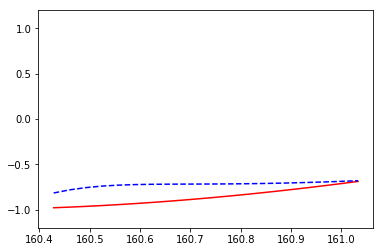

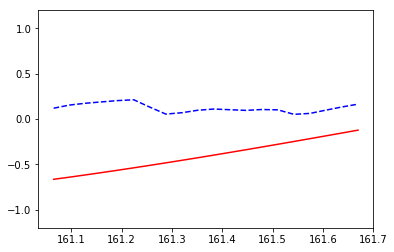

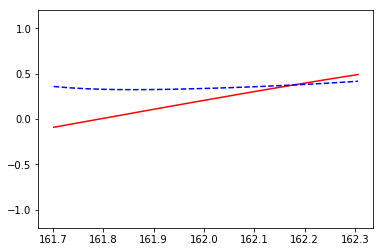

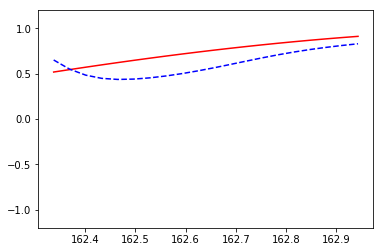

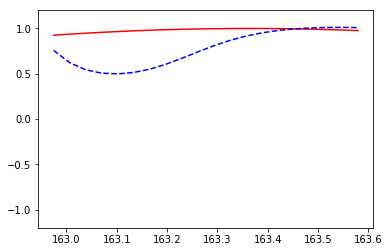

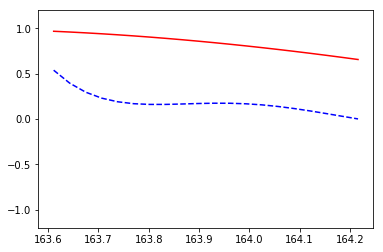

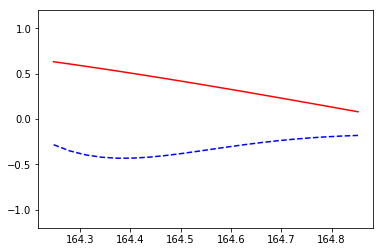

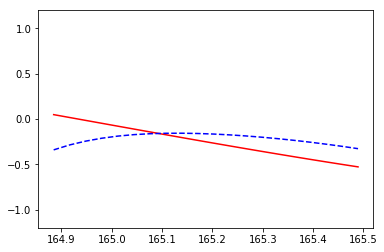

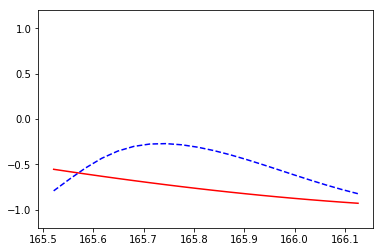

('train cost:', 0.016220566)


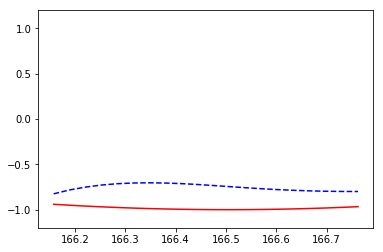

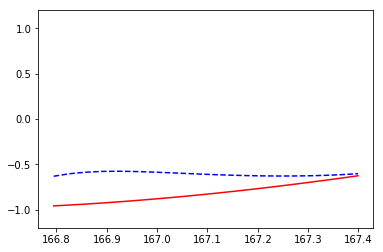

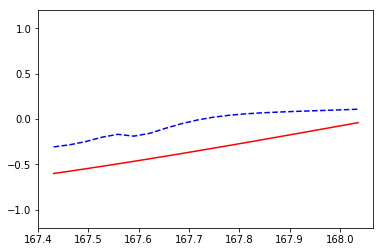

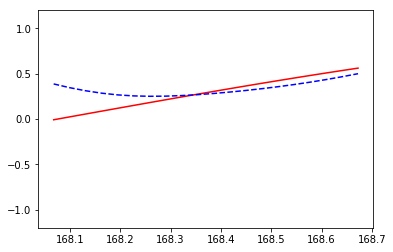

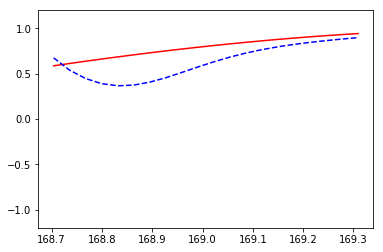

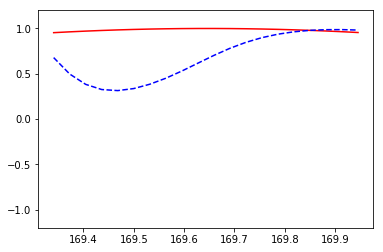

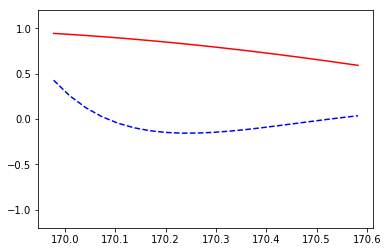

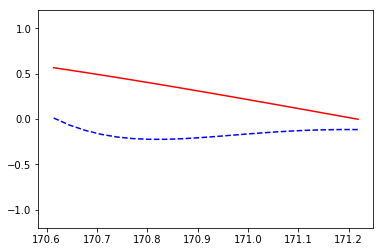

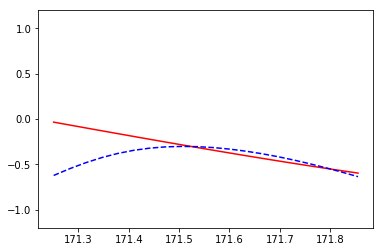

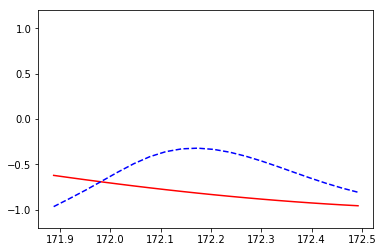

('train cost:', 0.015322323)


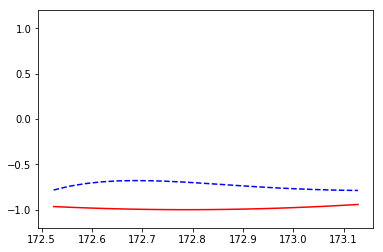

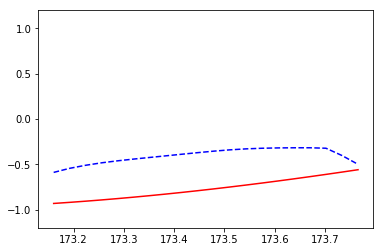

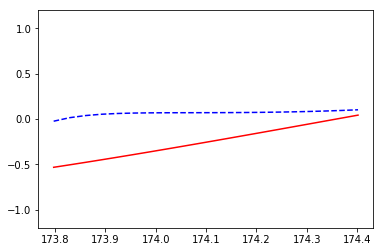

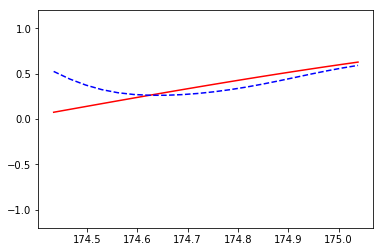

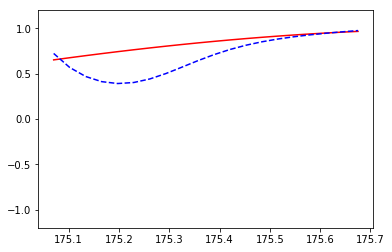

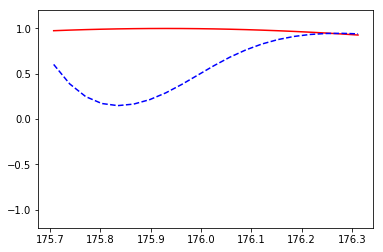

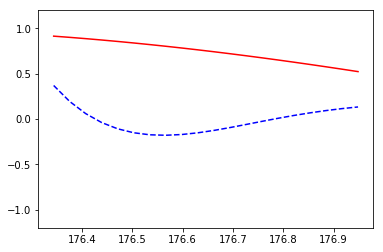

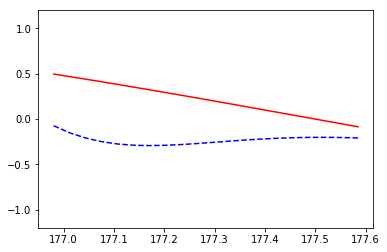

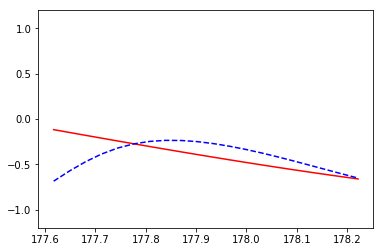

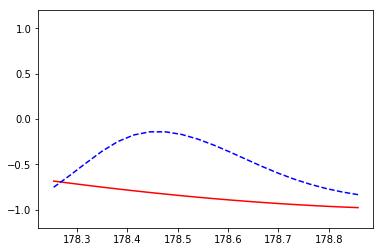

('train cost:', 0.013361011)


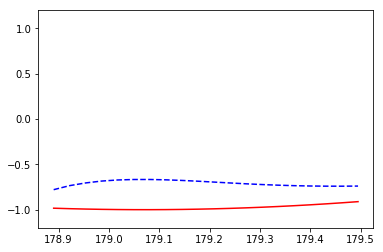

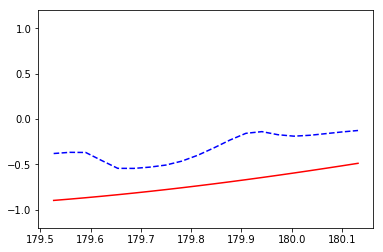

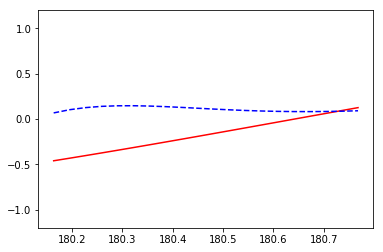

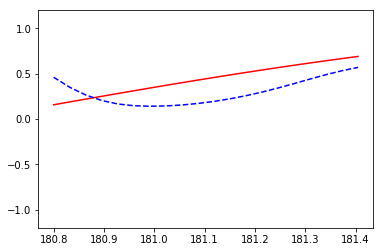

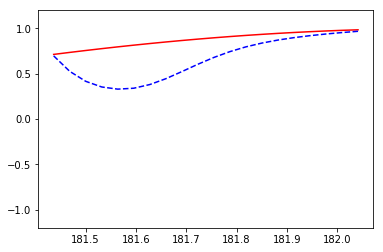

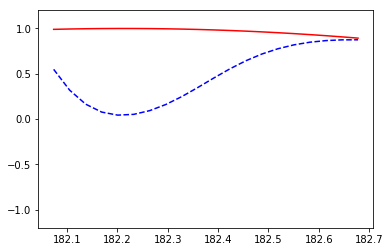

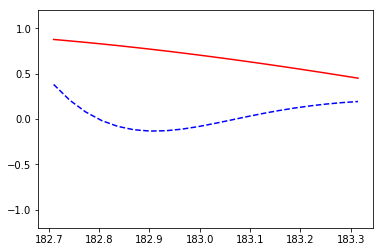

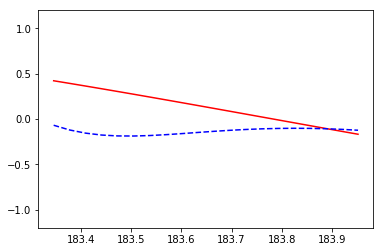

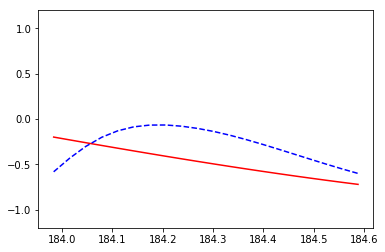

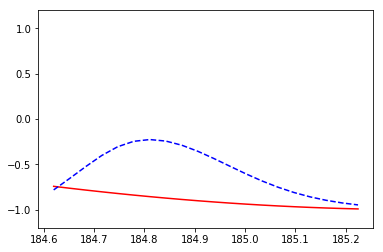

('train cost:', 0.014187131)


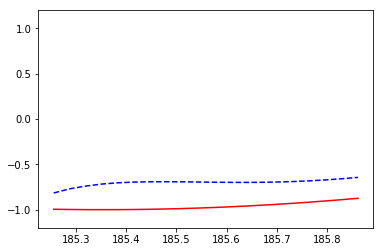

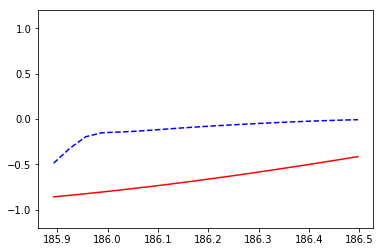

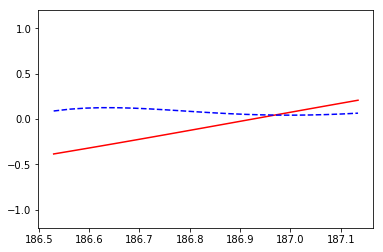

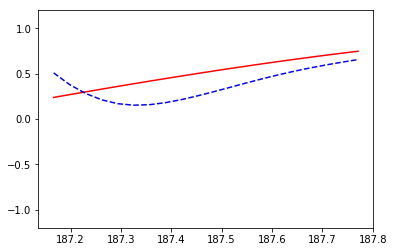

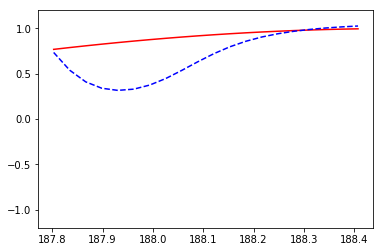

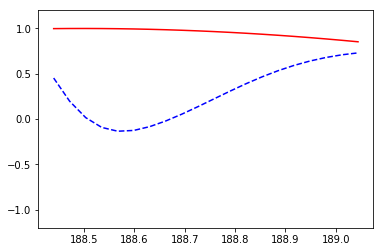

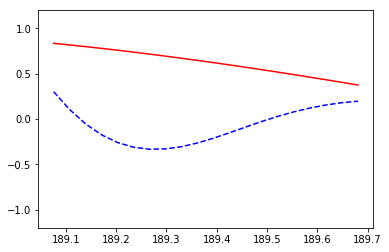

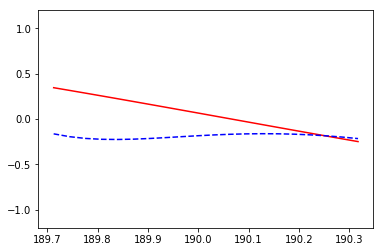

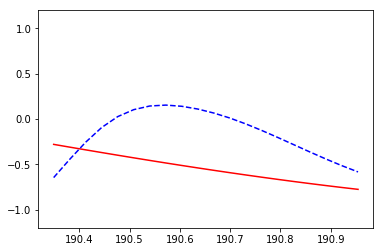

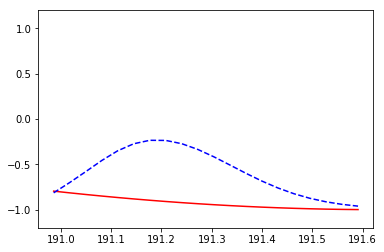

('train cost:', 0.011587247)


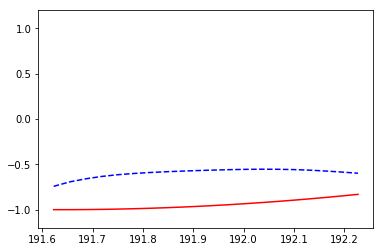

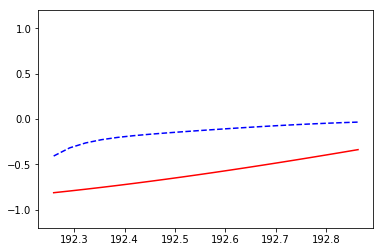

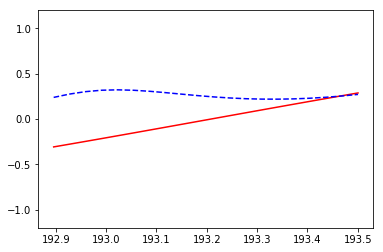

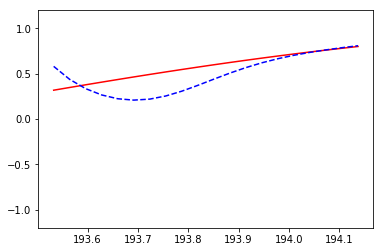

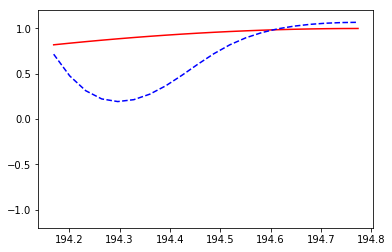

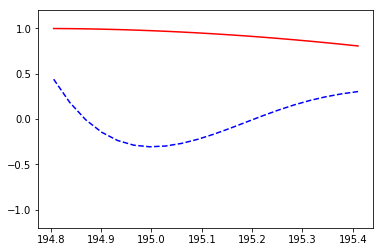

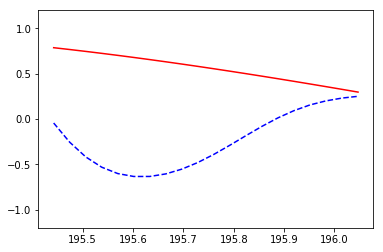

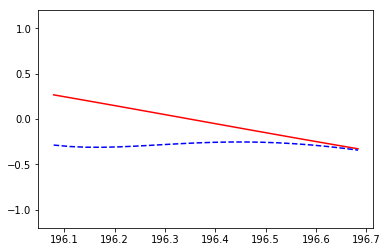

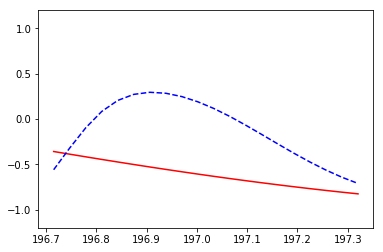

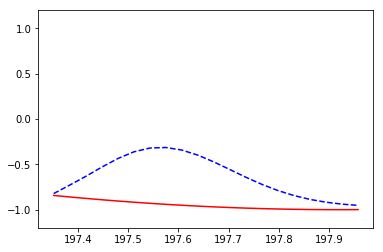

('train cost:', 0.015841082)


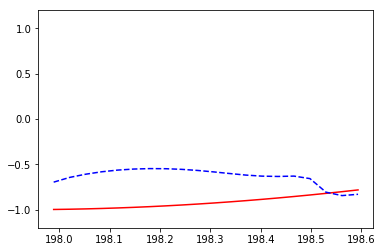

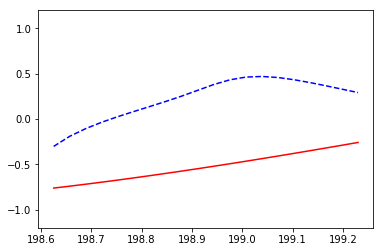

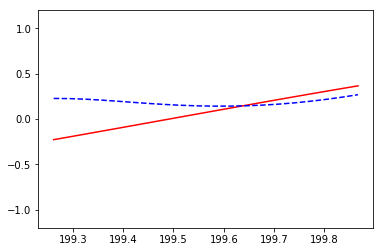

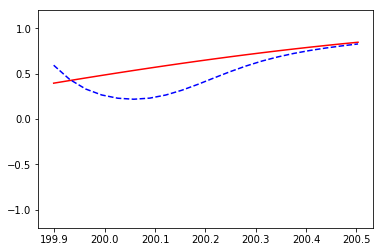

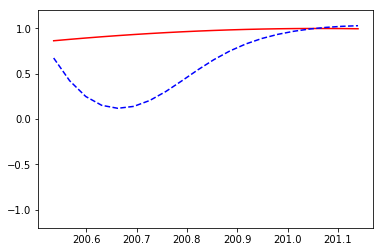

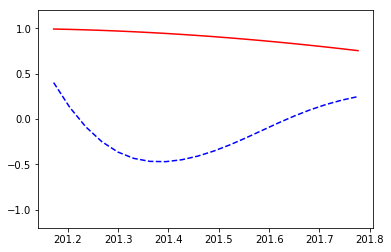

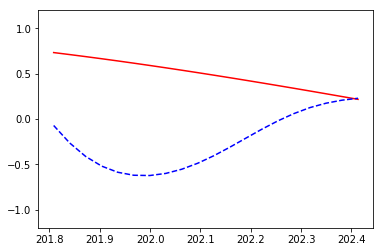

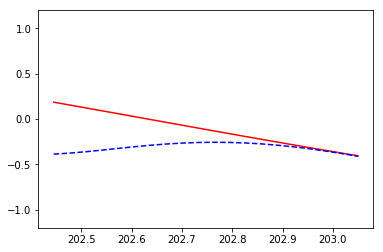

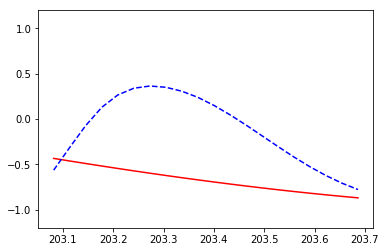

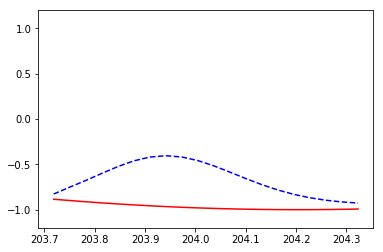

('train cost:', 0.016610486)


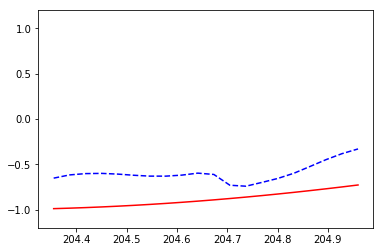

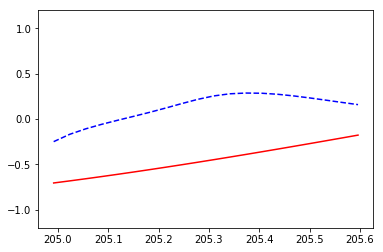

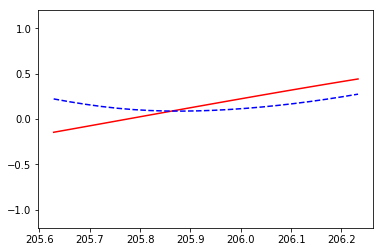

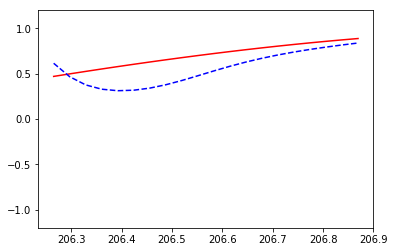

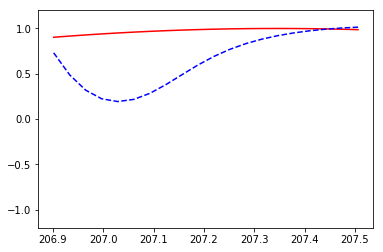

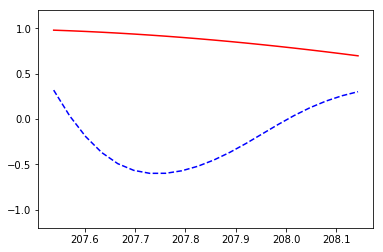

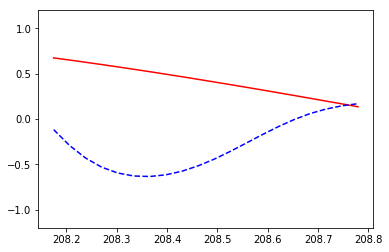

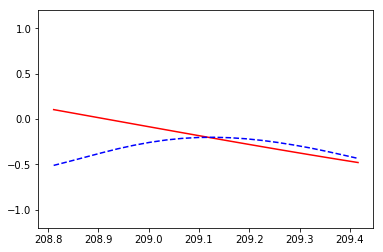

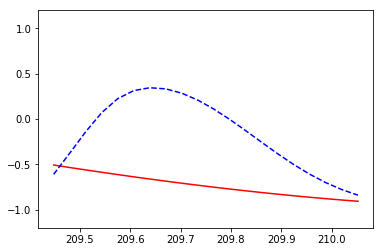

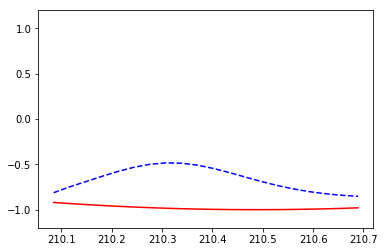

('train cost:', 0.022362225)


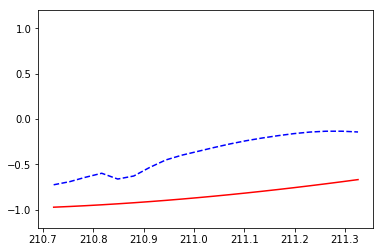

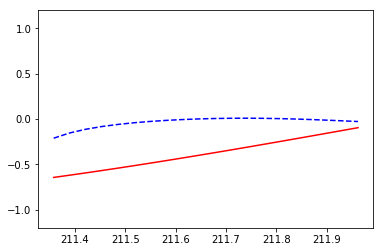

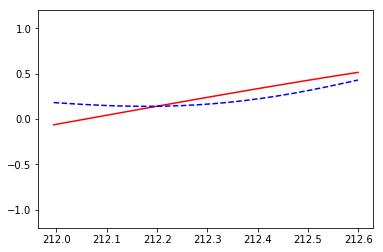

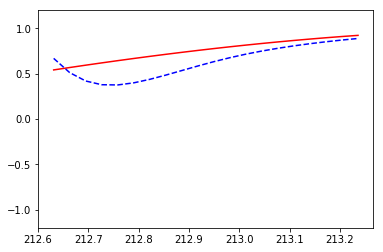

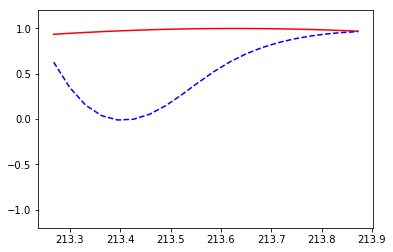

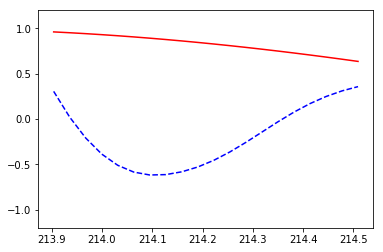

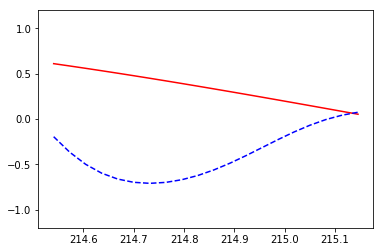

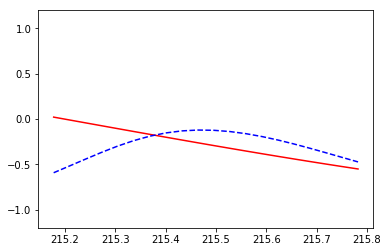

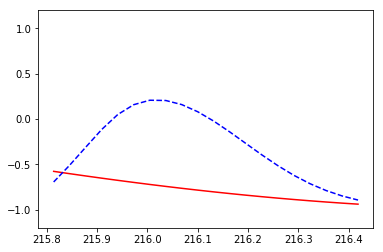

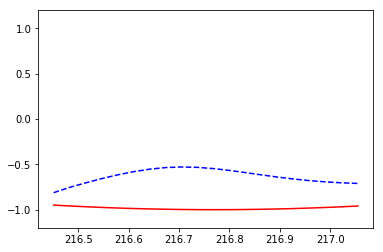

('train cost:', 0.02100953)


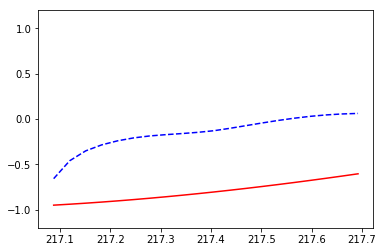

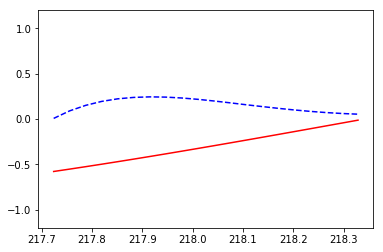

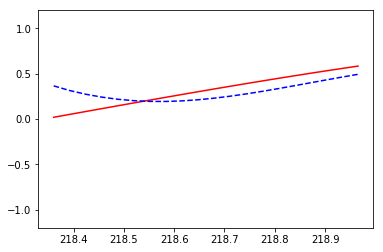

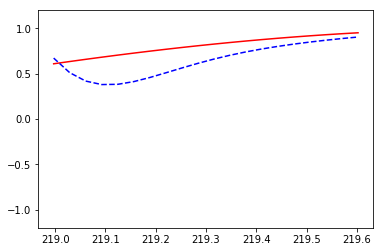

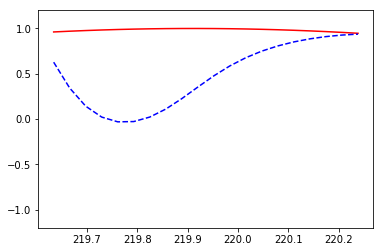

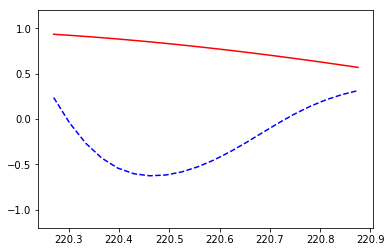

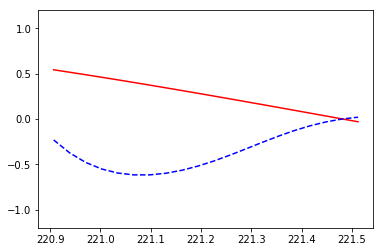

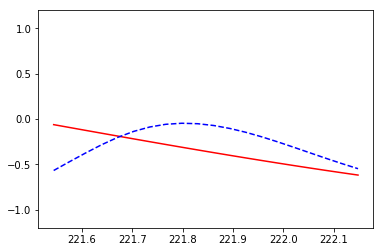

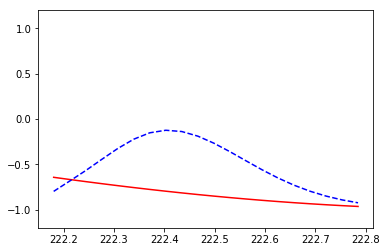

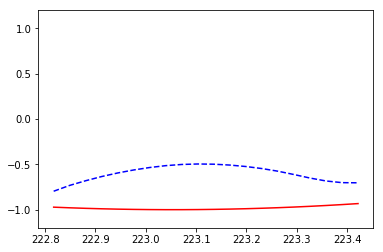

('train cost:', 0.026076686)


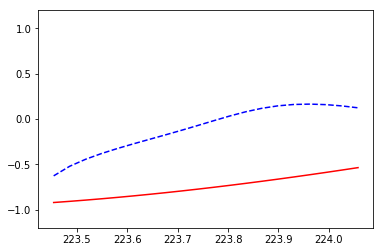

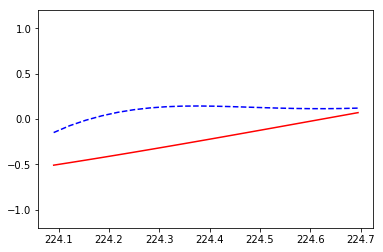

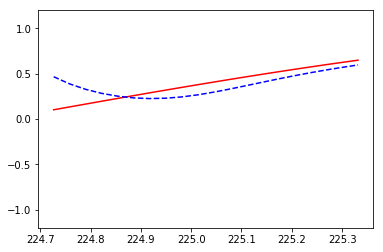

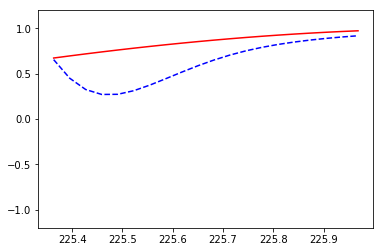

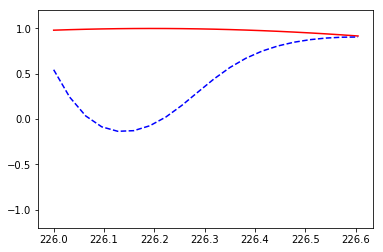

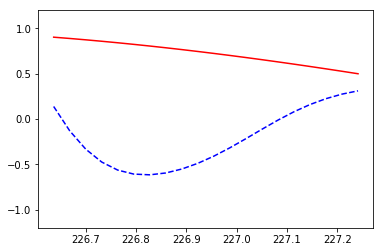

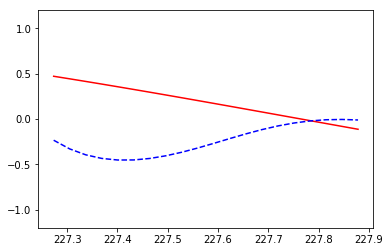

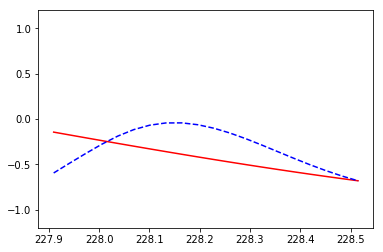

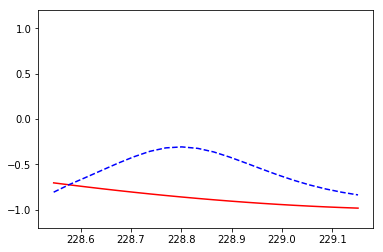

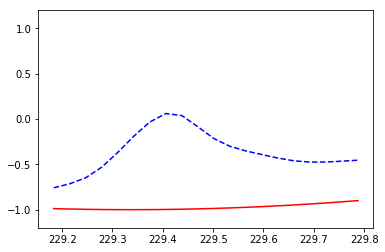

('train cost:', 0.031099988)


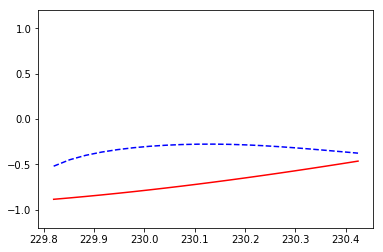

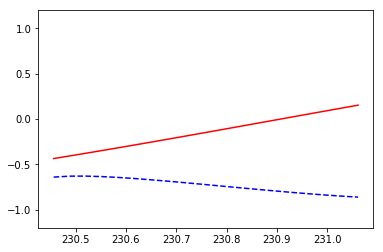

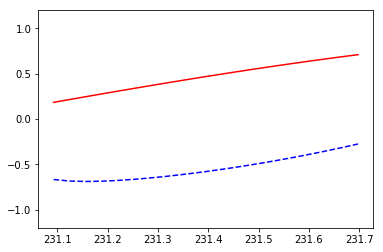

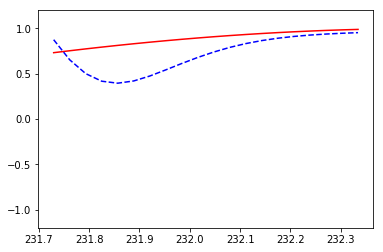

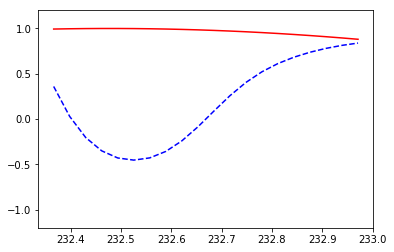

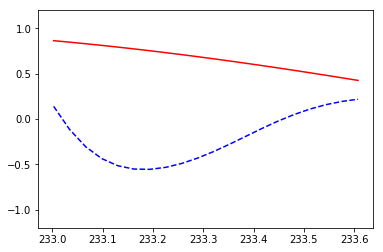

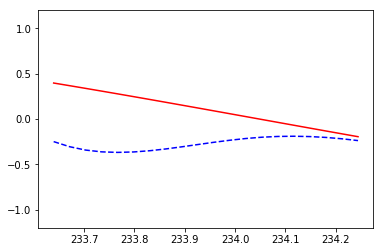

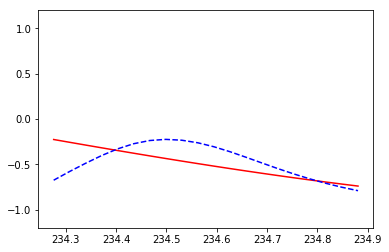

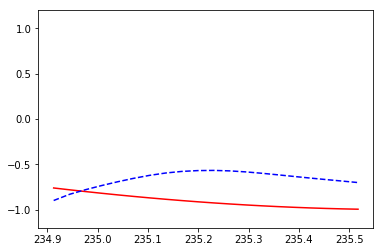

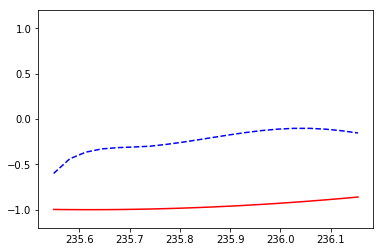

('train cost:', 0.05349517)


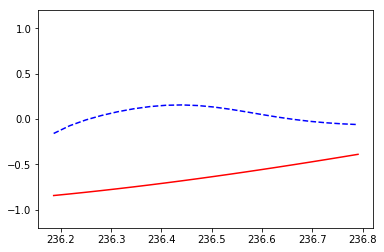

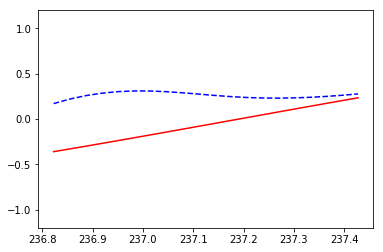

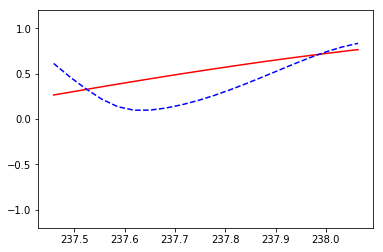

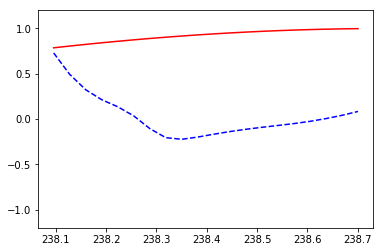

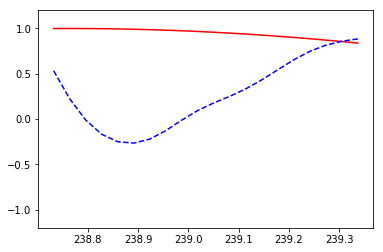

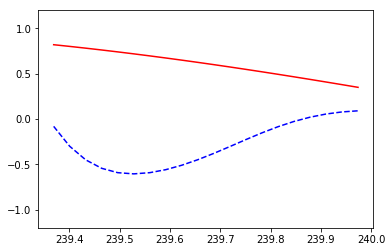

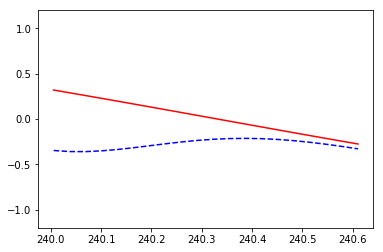

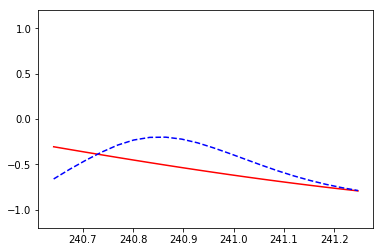

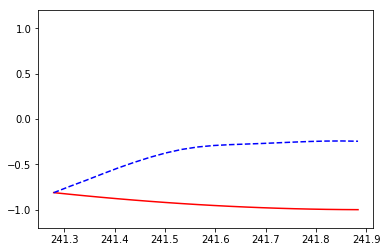

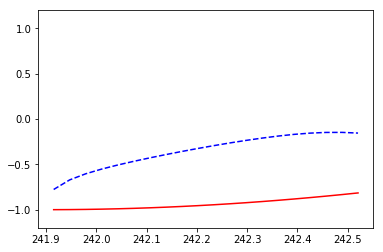

('train cost:', 0.0439506)


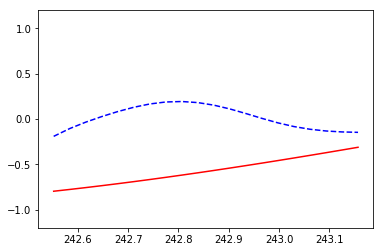

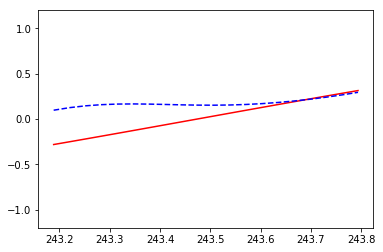

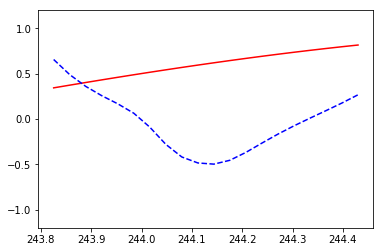

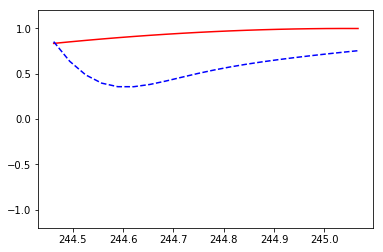

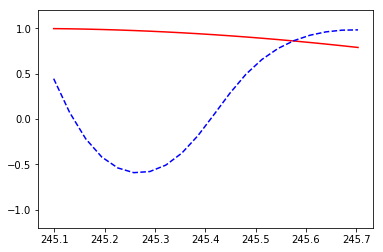

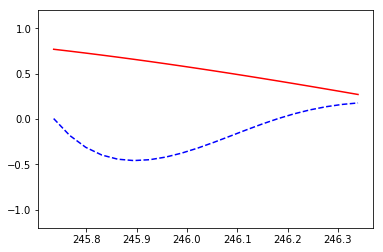

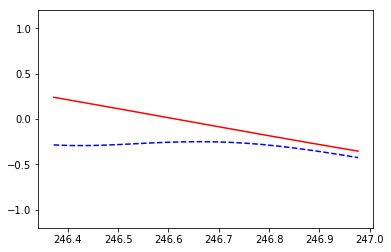

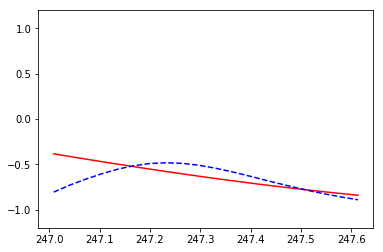

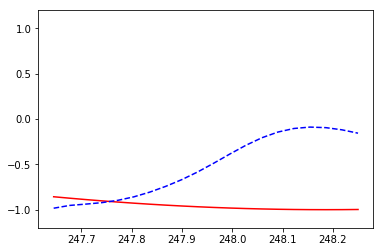

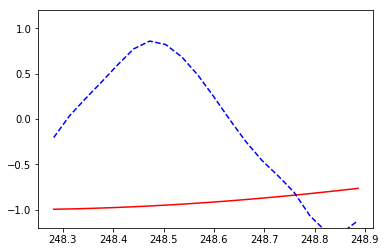

('train cost:', 0.041629016)


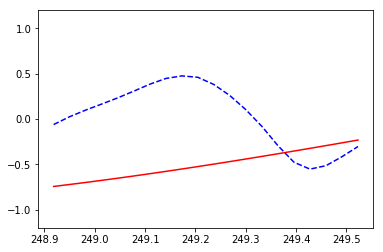

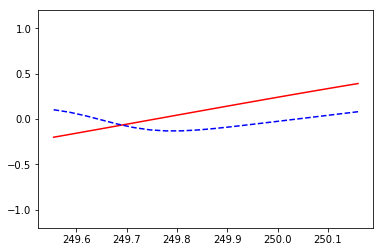

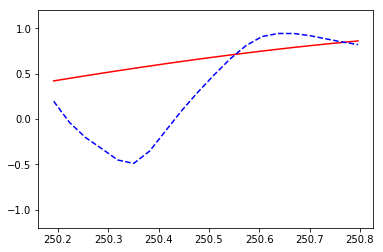

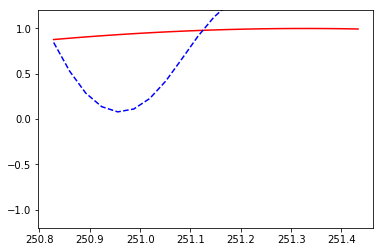

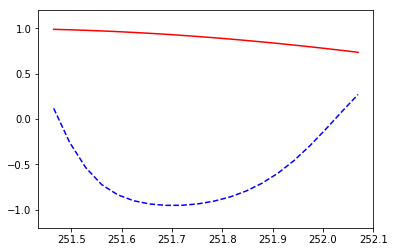

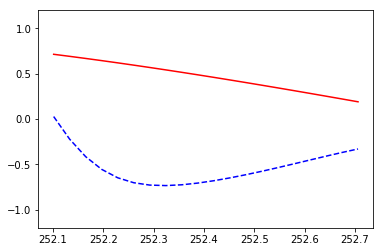

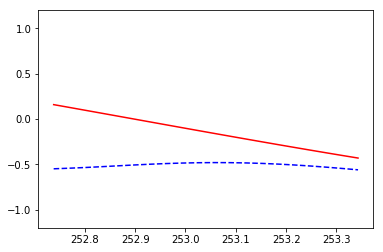

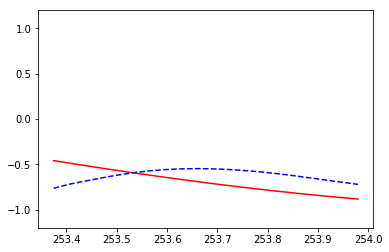

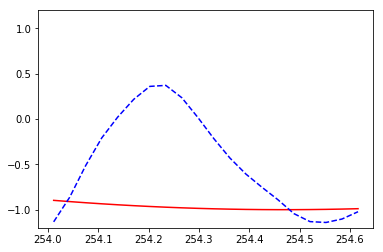

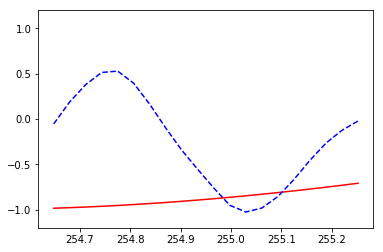

('train cost:', 0.07182957)


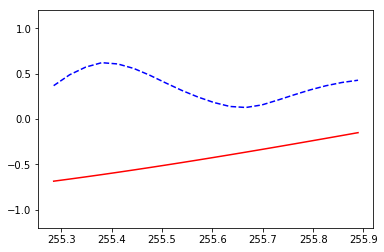

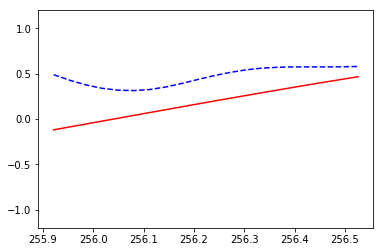

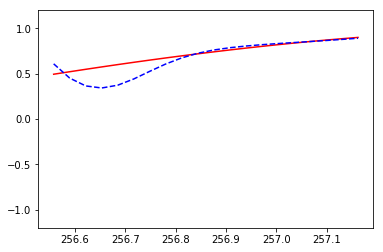

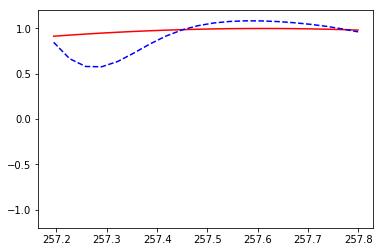

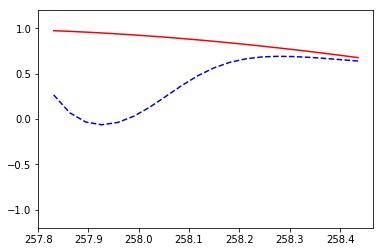

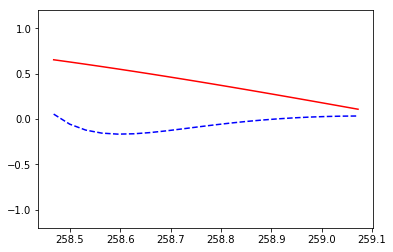

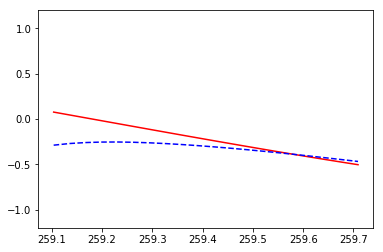

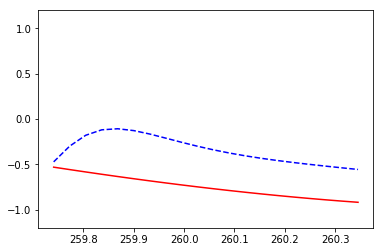

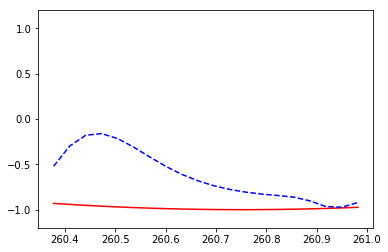

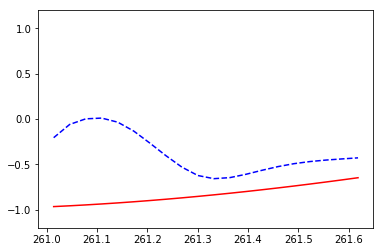

('train cost:', 0.08643243)


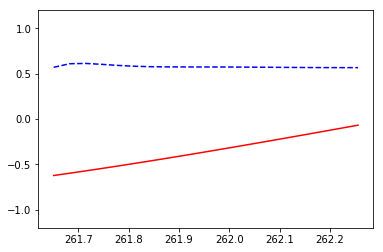

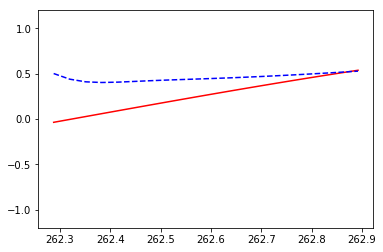

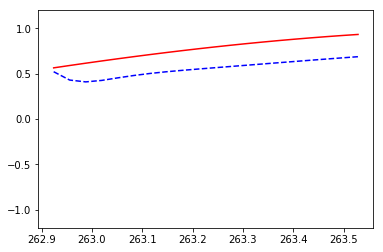

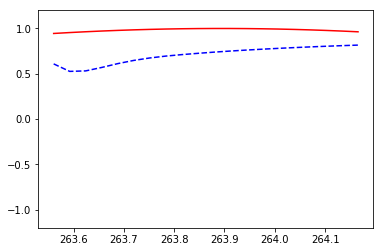

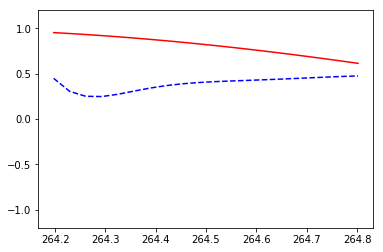

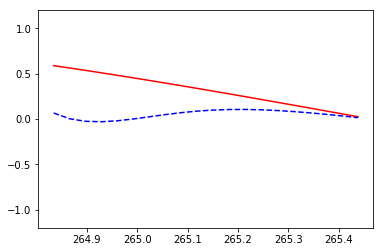

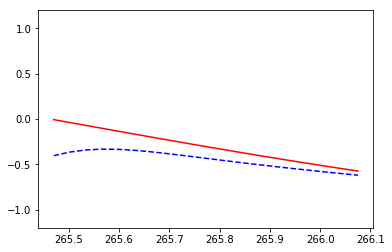

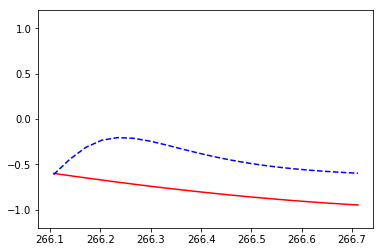

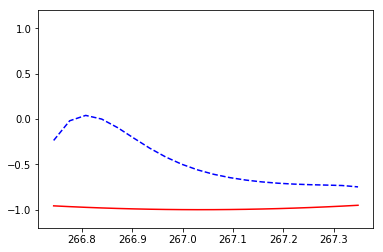

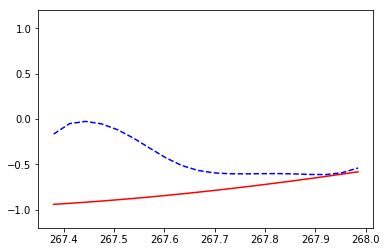

('train cost:', 0.10561514)


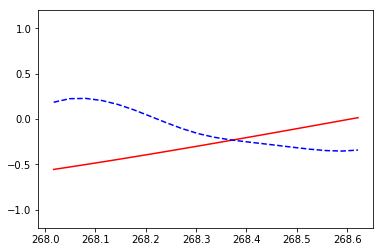

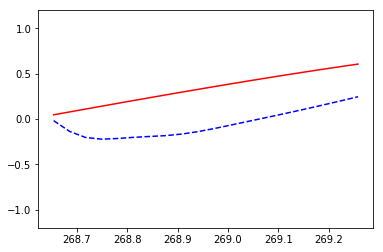

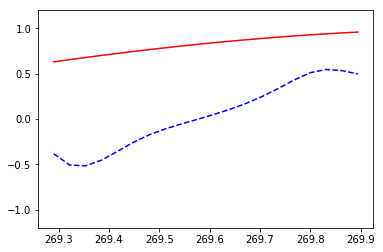

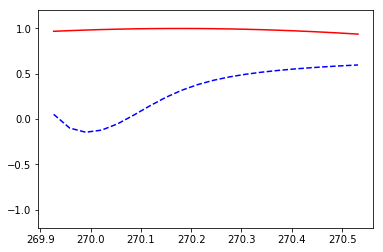

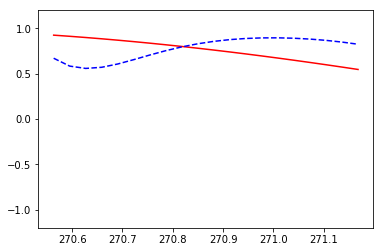

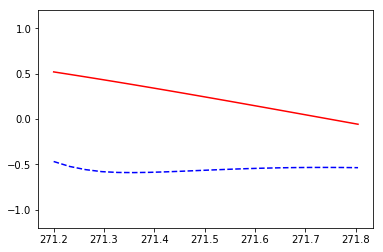

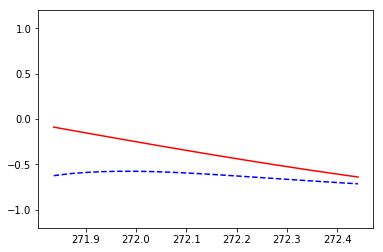

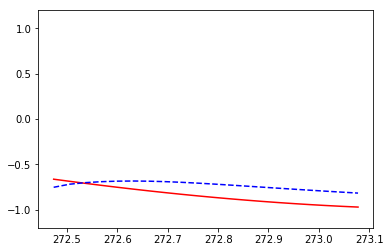

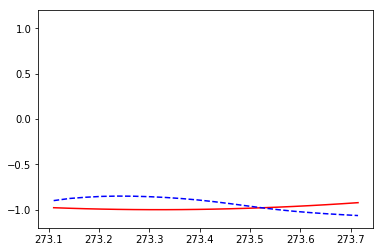

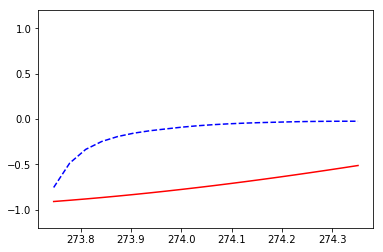

('train cost:', 0.12849429)


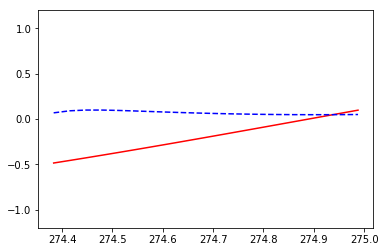

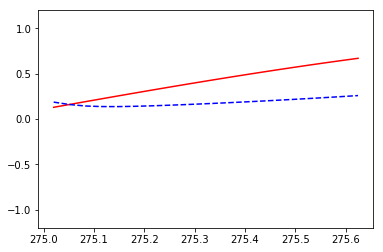

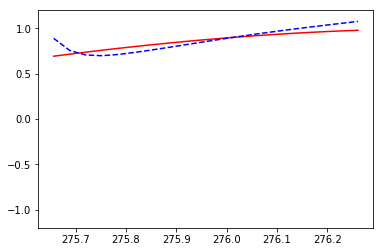

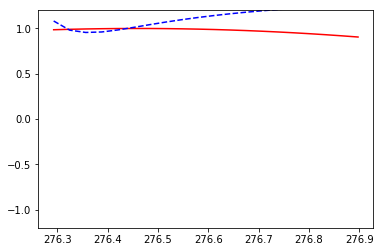

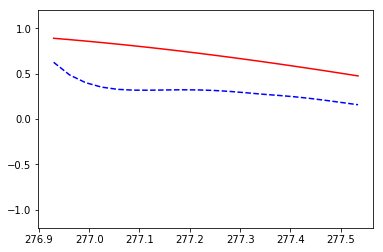

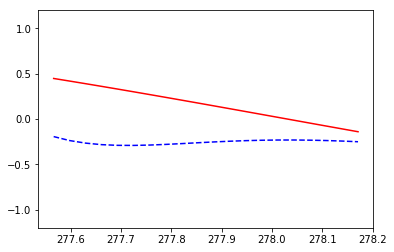

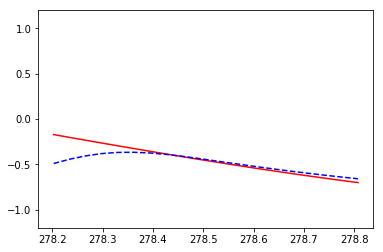

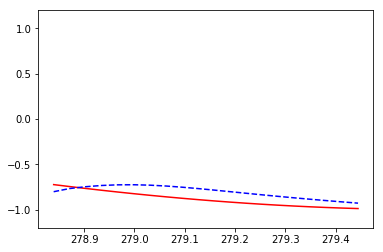

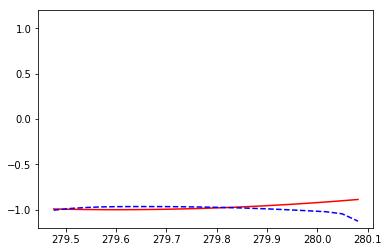

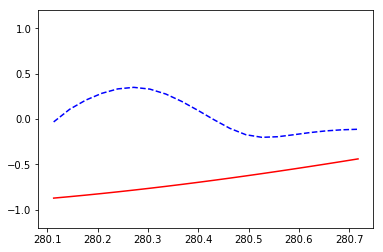

('train cost:', 0.09418583)


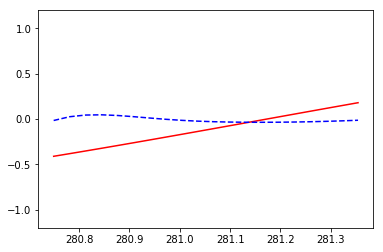

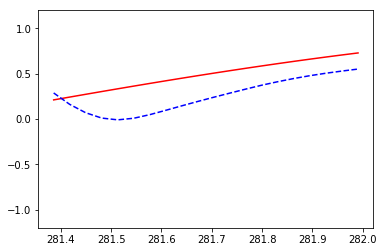

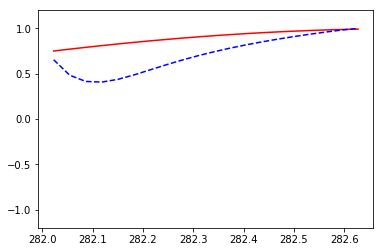

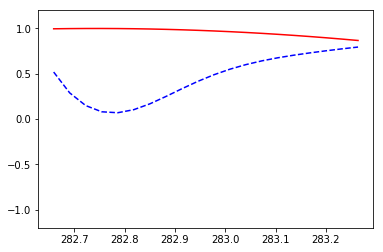

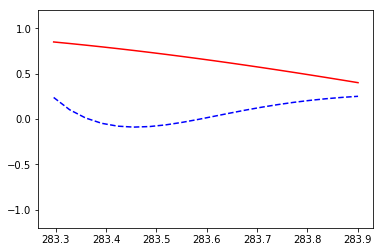

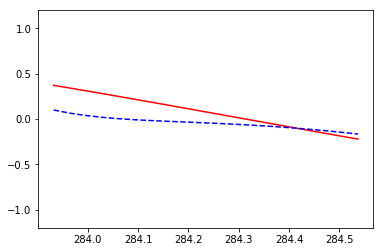

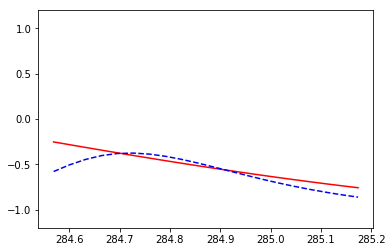

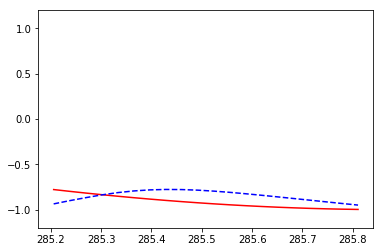

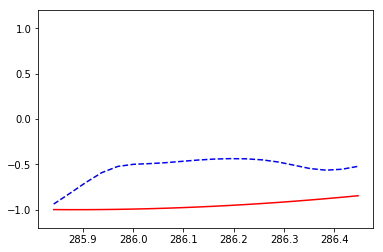

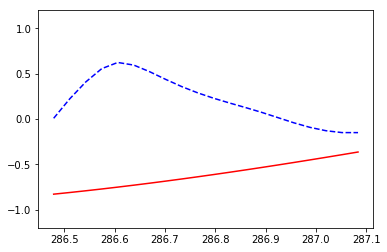

('train cost:', 0.063238636)


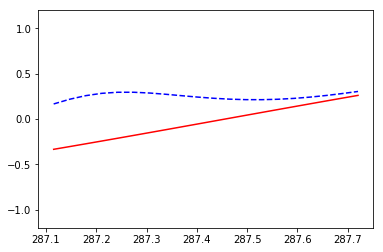

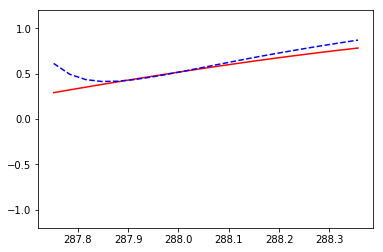

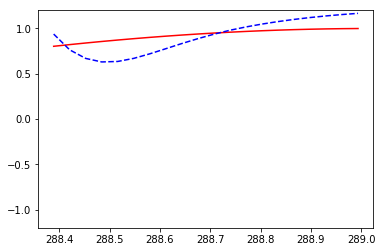

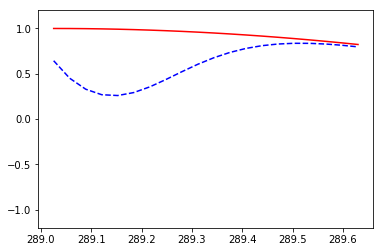

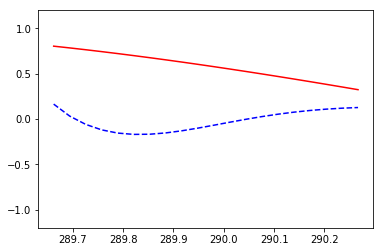

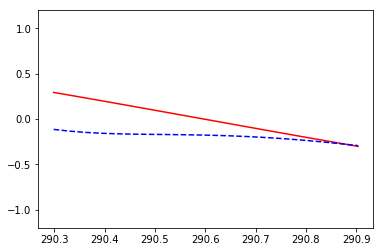

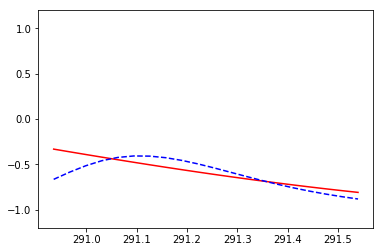

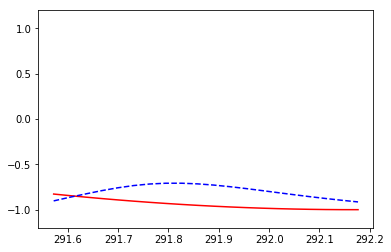

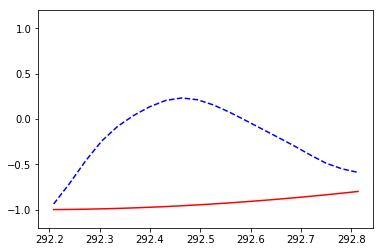

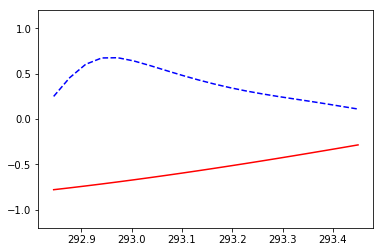

('train cost:', 0.035166644)


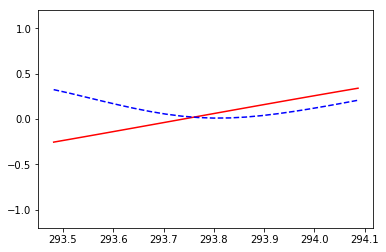

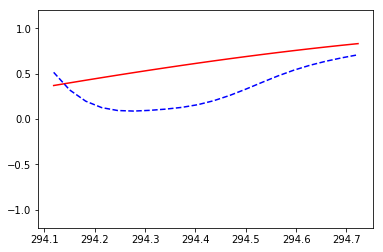

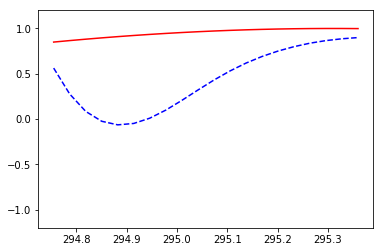

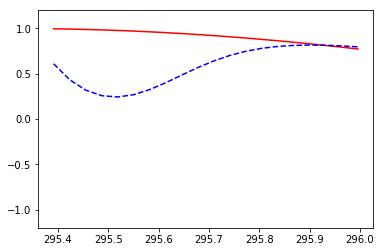

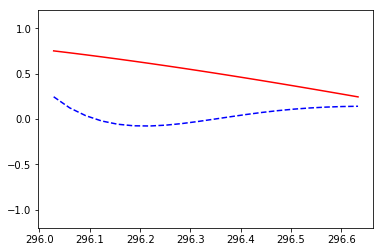

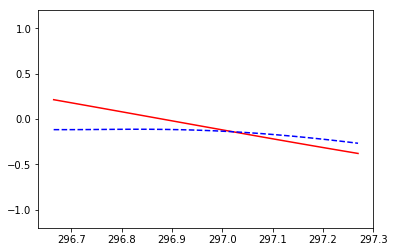

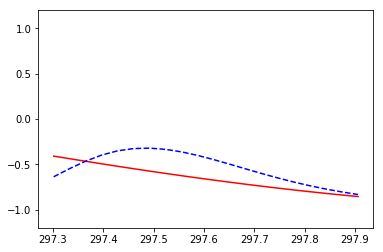

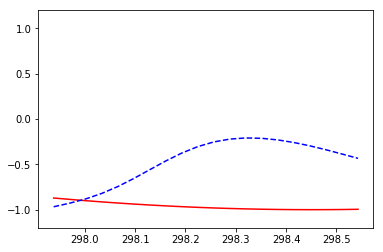

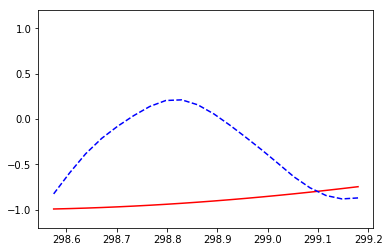

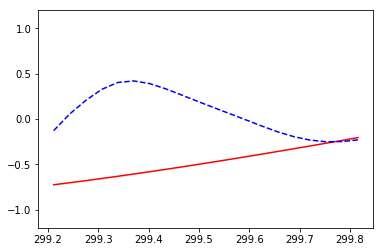

('train cost:', 0.019488439)


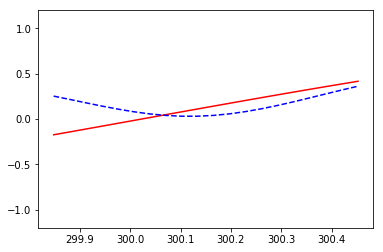

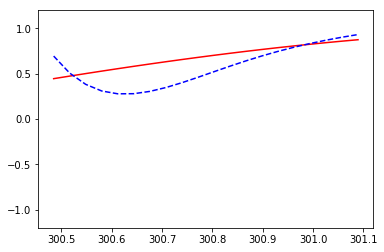

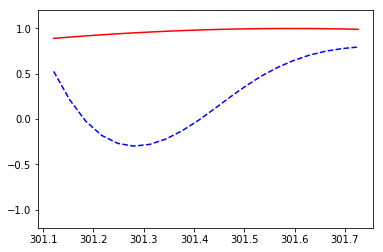

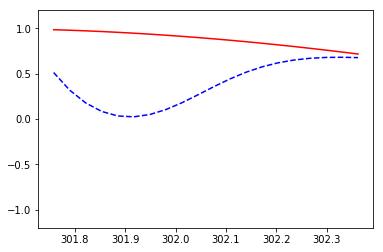

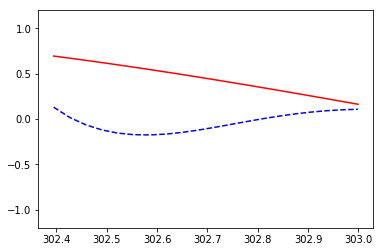

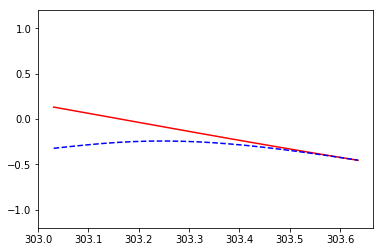

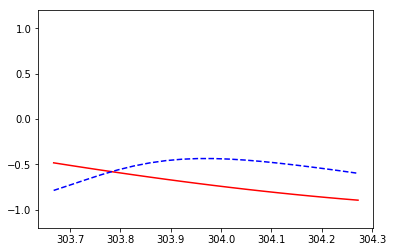

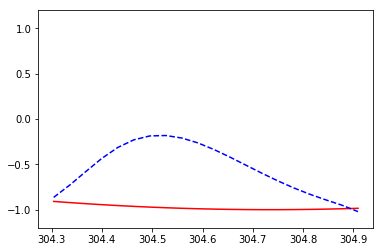

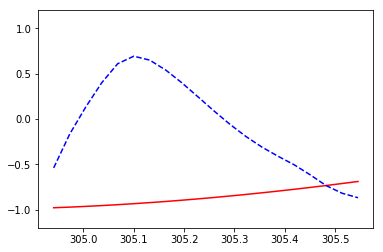

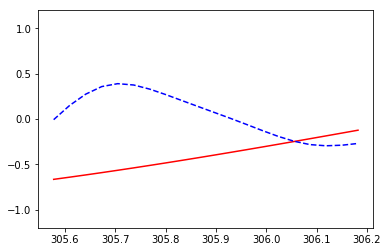

('train cost:', 0.020813439)


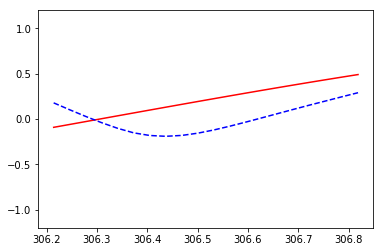

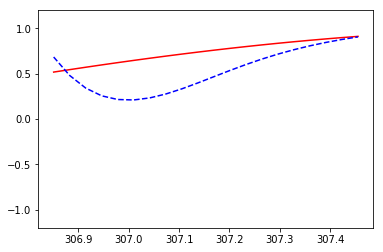

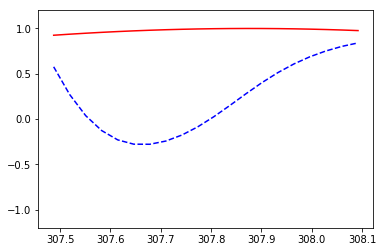

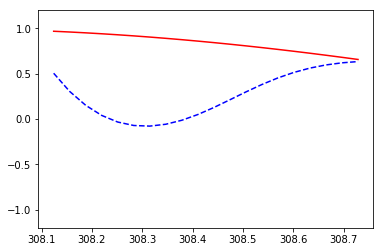

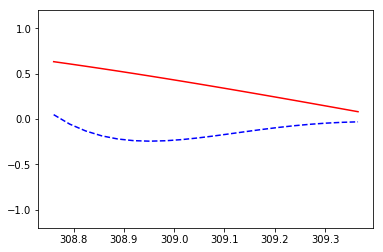

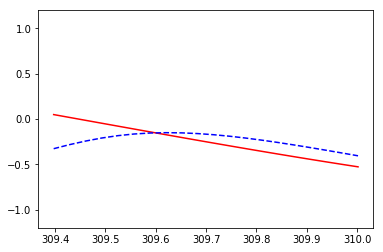

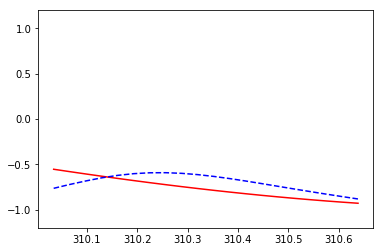

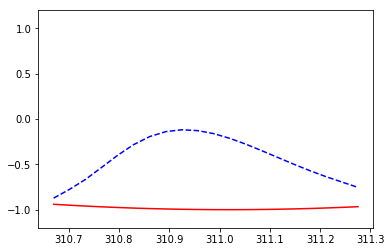

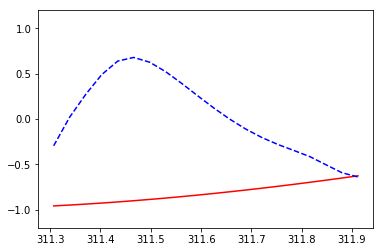

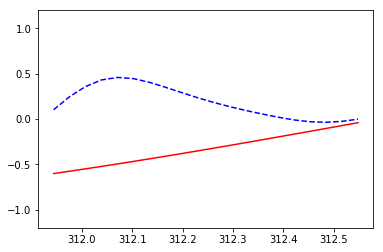

('train cost:', 0.0070210104)


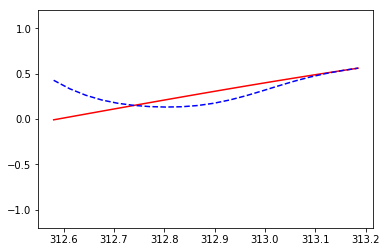

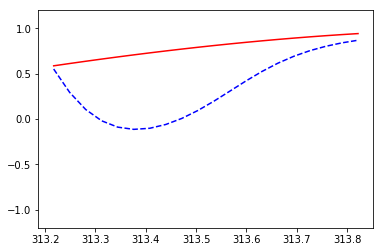

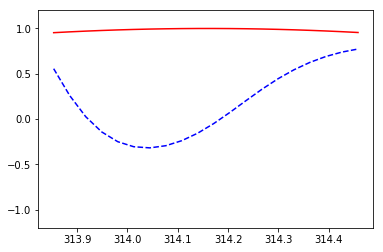

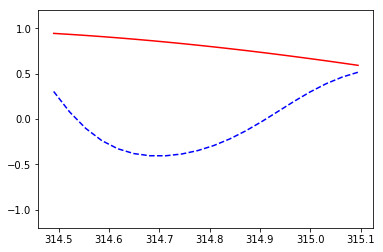

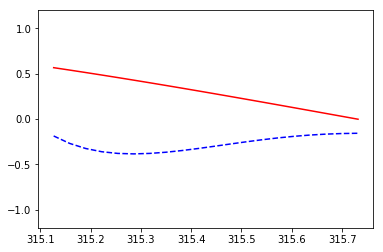

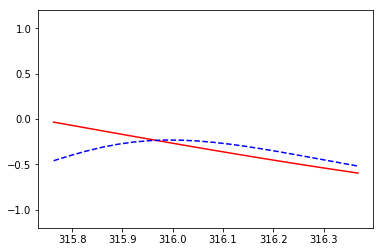

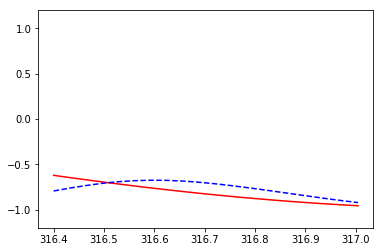

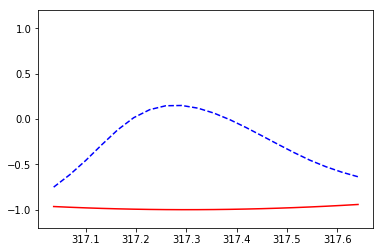

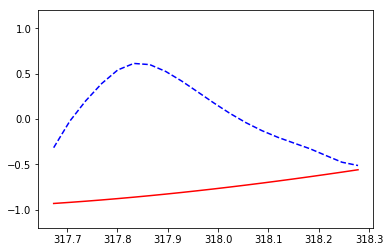

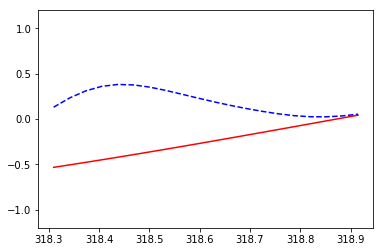

('train cost:', 0.008323001)


In [2]:
#LSTM Regresor
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 64
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006

def get_batch():
    global BATCH_START, TIME_STEPS
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS))/(10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
#     plt.plot(xs[0,:],res[0,:],'r',xs[0,:],seq[0,:],'b--')
#     plt.show()
    return [seq[:,:,np.newaxis], res[:, :, np.newaxis], xs]

# print(get_batch())

model = Sequential()
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    output_dim = CELL_SIZE,
    return_sequences=True,   #默认为False， false时只输出最后一个值，True输出每个时间点的值
    stateful=True,           #当前batch和上一个batch是关联的
    ))

model.add(TimeDistributed(Dense(OUTPUT_SIZE))) #对每个时间输出点进行全联接计算

adam = Adam(LR)
model.compile(optimizer=adam,
             loss='mse')

print("Training.....")
for step in range(501):
    x_batch, y_batch, xs = get_batch()
    cost = model.train_on_batch(x_batch, y_batch)
    pred = model.predict(x_batch, BATCH_SIZE)
    plt.plot(xs[0,:], y_batch[0].flatten(), 'r', xs[0,:], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim(-1.2,1.2)
    plt.draw()
    plt.pause(0.5)
    if step % 10 == 0:
        print('train cost:', cost)


(60000, 784)
(10000, 784)


/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
/Users/s/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0827
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0465
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0410
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0389
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0387
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0386
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0386
Epoch 8/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0385
Epoch 9/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0384
Epoch 10/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0383
Epoch 11/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0383
Epoch 12/20
60000/60000 [===========================

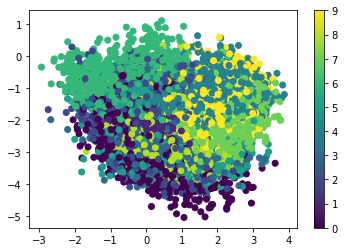

In [4]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255-0.5
x_test = x_test.astype('float32')/255-0.5
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))
print(x_train.shape)
print(x_test.shape)

#784压缩为2
encoding_dim = 2

#Input相当于placeholder
input_img = Input(shape=(784,))

#encoder layer   输出                    输入
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64,activation='relu')(encoded)
encoded = Dense(10,activation='relu')(encoded)
encoded_output = Dense(encoding_dim)(encoded)

#decoder layer
decoded = Dense(10,activation='relu')(encoded_output)
decoded = Dense(64,activation='relu')(encoded)
decoded = Dense(128,activation='relu')(encoded)
decoded = Dense(784,activation='tanh')(encoded)

"""两个模型，一个是编码和解码整体，另一个只包含类编码"""
#construct the autoencoder model  从line19开始到line31
autoencoder = Model(input=input_img,output=decoded) 
#construct the encoder model for plotting 包含从line19 到line25
encoder = Model(input=input_img, output=encoded_output)

#compile autocoder
autoencoder.compile(optimizer='adam',loss='mse')

#training     输入输出值都是x_train
autoencoder.fit(x_train,x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
               )

#plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c = y_test)
plt.colorbar()
plt.show()

In [ ]:
#keras 的save 和 reload
'''
保存可以保存：
        整个模型：  
                from keras.models import load_model
                model.save('name.h5')
                
                model = load_model('my_model.h5')
        权值：   
                model.save_weights('name.h5') 
                
                model.load_weights('name.h5')
        模型：
                from keras.models import model_from_json
                
                json_string = model.to_json()
                
                model = model_from_json(json_string)
'''

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

print(x_test[0])

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

[ 0.72180898  0.49564693  0.63802295  0.5652228   0.97393518  0.74611722
  0.24571691  0.74338468  0.66851329  0.8588212   0.65667949  0.60739259
  0.73512404  0.36268436  0.66938402  0.11191929  0.45159007  0.62211496
  0.07790277  0.35461872]
Epoch 1/20
1000/1000 [==============================] - 0s 487us/step - loss: 2.3399 - acc: 0.0940
Epoch 2/20
1000/1000 [==============================] - 0s 17us/step - loss: 2.3293 - acc: 0.0920
Epoch 3/20
1000/1000 [==============================] - 0s 19us/step - loss: 2.3231 - acc: 0.1020
Epoch 4/20
1000/1000 [==============================] - 0s 19us/step - loss: 2.3123 - acc: 0.1070
Epoch 5/20
1000/1000 [==============================] - 0s 17us/step - loss: 2.3058 - acc: 0.1030
Epoch 6/20
1000/1000 [==============================] - 0s 20us/step - loss: 2.3114 - acc: 0.0990
Epoch 7/20
1000/1000 [==============================] - 0s 18us/step - loss: 2.3092 - acc: 0.1010
Epoch 8/20
1000/1000 [==============================] - 0s 18us/step

In [8]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
100/100 [==============================] - 5s 47ms/step - loss: 2.4379
Epoch 2/10
100/100 [==============================] - 4s 39ms/step - loss: 2.3097
Epoch 3/10
100/100 [==============================] - 4s 39ms/step - loss: 2.2971
Epoch 4/10
100/100 [==============================] - 4s 39ms/step - loss: 2.3132
Epoch 5/10
100/100 [==============================] - 4s 39ms/step - loss: 2.2867
Epoch 6/10
100/100 [==============================] - 4s 39ms/step - loss: 2.3108
Epoch 7/10
100/100 [==============================] - 4s 39ms/step - loss: 2.2942
Epoch 8/10
100/100 [==============================] - 4s 39ms/step - loss: 2.3020
Epoch 9/10
100/100 [==============================] - 4s 39ms/step - loss: 2.3036
Epoch 10/10
20/20 [==============================] - 0s 19ms/step


In [4]:


print(Y_test.shape[0])

10000
